In [ ]:
coaches_career = pd.read_csv('coaches_career.txt')
coaches_season = pd.read_csv('coaches_season.txt')
# draft = pd.read_csv('draft.txt', encoding='cp1252')
player_allstar = pd.read_csv('player_allstar.txt')
player_playoffs = pd.read_csv('player_playoffs.txt')
player_playoffs_career = pd.read_csv('player_playoffs_career.txt')
player_regular_season = pd.read_csv('player_regular_season.txt')
player_regular_season_career = pd.read_csv('player_regular_season_career.txt')
players = pd.read_csv('players.txt')
team_season = pd.read_csv('team_season.txt')
teams = pd.read_csv('teams.txt')

# Loading Data

In [1]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!

     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 2.1MB 10.8MB/s 
  Created wheel for pyod: filename=pyod-0.8.4-cp36-none-any.whl size=112082 sha256=82c94a9cfd21fad0112b88affcd089d11396f6ace451390ea0be06adaa168eb6
  Stored in directory: /root/.cache/pip/wheels/ad/31/0a/c2d4ba2d066145c55f0cb2846e59b18d874cb59c5d9adc81cf
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=ce23be962733343a0d44329c5c5fe0c1f27fd966e841fe06982cb98086a25d03
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=d72da047e758bd2c9cafdb89516c3c00a5f3a2e040bdf00b6cc9713bdfe0025a
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod
Requirement already up-to-date: pyod in /usr/local/lib/python3.6/dist-packages (0.8.4)


In [2]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()

Saving coaches_career.txt to coaches_career.txt
Saving coaches_season.txt to coaches_season.txt
Saving draft.txt to draft.txt
Saving player_allstar.txt to player_allstar.txt
Saving player_playoffs.txt to player_playoffs.txt
Saving player_playoffs_career.txt to player_playoffs_career.txt
Saving player_regular_season.txt to player_regular_season.txt
Saving player_regular_season_career.txt to player_regular_season_career.txt
Saving players.txt to players.txt
Saving team_season.txt to team_season.txt
Saving teams.txt to teams.txt


In [4]:
coaches_career = pd.read_csv('coaches_career.txt')
coaches_season = pd.read_csv('coaches_season.txt')
# draft = pd.read_csv('draft.txt', encoding='cp1252')
player_allstar = pd.read_csv('player_allstar.txt')
player_playoffs = pd.read_csv('player_playoffs.txt')
player_playoffs_career = pd.read_csv('player_playoffs_career.txt')
player_regular_season = pd.read_csv('player_regular_season.txt')
player_regular_season_career = pd.read_csv('player_regular_season_career.txt')
players = pd.read_csv('players.txt')
team_season = pd.read_csv('team_season.txt')
teams = pd.read_csv('teams.txt')

# Data Pre-processing


In [ ]:
def clean_duplicates(df):
    flagged_duplicates = df.duplicated(subset=['ilkid','year'], keep=False)
    
    to_drop = [] 
    
    for i in range(flagged_duplicates.shape[0]):
        if(flagged_duplicates[i]==True and df.iloc[i]['team'] != "TOT"):
            to_drop.append(i)
    
    for i in range(len(to_drop)):
        df.drop(to_drop[i],inplace=True)
    
    return df

In [ ]:
player_regular_season.head(10)

ilkid  year firstname   lastname team leag  ...  fga  fgm  fta  ftm  tpa  tpm
0  ABRAMJO01  1946      John  Abramovic  PIT    N  ...  834  202  178  123    0    0
1  AUBUCCH01  1946      Chet   Aubuchon  DE1    N  ...   91   23   35   19    0    0
2  BAKERNO01  1946      Norm      Baker  CH1    N  ...    1    0    0    0    0    0
3  BALTIHE01  1946  Herschel  Baltimore  ST1    N  ...  263   53   69   32    0    0
4   BARRJO01  1946      John       Barr  ST1    N  ...  438  124   79   47    0    0
5  BAUMHFR01  1946   Frankie  Baumholtz  CL1    N  ...  856  255  156  121    0    0
6  BECKEMO01  1946       Moe     Becker  BOS    N  ...   22    5    4    3    0    0
7  BECKEMO01  1946       Moe     Becker  DE1    N  ...  107   19   10    3    0    0
8  BECKEMO01  1946       Moe     Becker  PIT    N  ...  229   46   30   16    0    0
9  BECKEMO01  1946       Moe     Becker  TOT    N  ...  358   70   44   22    0    0

[10 rows x 23 columns]

In [ ]:
cleaned_data = clean_duplicates(player_playoffs)

In [ ]:
cleaned_data.head(10)

ilkid  year firstname    lastname team  ... fgm  fta  ftm  tpa  tpm
0  ARMSTPA01   1949      Paul   Armstrong  FTW  ...   4    4    1    0    0
1  BARKECL01   1949     Cliff      Barker  INI  ...  12   15   10    0    0
2  BARNHLE01   1949       Leo   Barnhorst  CH1  ...   8    6    6    0    0
3  BEARDRA01   1949     Ralph       Beard  INI  ...  22   28   22    0    0
4  BLACKCH01   1949   Charlie       Black  AND  ...  18   29   21    0    0
5  BOBBNE01    1949    Nelson        Bobb  PH1  ...   1    0    0    0    0
6  BORNHJA01   1949      Jake  Bornheimer  PH1  ...   1    0    0    0    0
7  BORYLVI01   1949     Vince      Boryla  NYK  ...  23   32   29    0    0
8  BRANNBO01   1949       Bob     Brannum  SHE  ...  15   20   13    0    0
9  BRAUNCA01   1949      Carl       Braun  NYK  ...  28   38   29    0    0

[10 rows x 23 columns]

In [ ]:
cleaned_data['credits'] = cleaned_data['pts']+cleaned_data['reb']+cleaned_data['asts']+cleaned_data['stl']+cleaned_data['blk']-(cleaned_data['fga']-cleaned_data['fgm'])-(cleaned_data['fta']-cleaned_data['ftm'])-cleaned_data['turnover']

In [ ]:
cleaned_data['av'] = (cleaned_data['credits']**(3/4))/21

In [ ]:
cleaned_data['eff'] = cleaned_data['credits']/cleaned_data['gp']

In [ ]:
def data_4_year(year):
    data_year = cleaned_data[cleaned_data['year']==year]
    data_year.reset_index(inplace=True)
    return data_year

In [ ]:
def select_features(data_year):
    X = data_year[['av','eff']].to_numpy()
    X = np.nan_to_num(X)
    return X

In [ ]:
data_for_year = data_4_year(2004)
X = select_features(data_for_year)
print(X)

[[ 2.94886756 22.27272727]
 [ 0.43335709  2.71428571]
 [ 0.53239714  3.125     ]
 [ 1.15240262 14.        ]
 [ 2.48488711 19.5       ]
 [ 0.54829049  2.88888889]
 [ 0.92211102  2.73684211]
 [ 0.59508527  4.14285714]
 [ 0.64068298  2.66666667]
 [ 2.26165856  7.47826087]
 [ 1.14003326  9.85714286]
 [ 0.79961705 10.75      ]
 [ 0.54829049  6.5       ]
 [ 1.35650108 17.4       ]
 [ 5.09540243 20.32      ]
 [ 0.10854796  0.75      ]
 [ 0.         -0.5       ]
 [ 2.09184489  6.73913043]
 [ 0.45035315  2.85714286]
 [ 0.86838364  9.6       ]
 [ 0.34464877  2.        ]
 [ 0.36295196  1.25      ]
 [ 0.46713798  7.        ]
 [ 0.39867353  3.4       ]
 [ 0.          0.        ]
 [ 0.04761905  1.        ]
 [ 0.7856293   3.5       ]
 [ 1.39143392 18.        ]
 [ 0.45035315  2.        ]
 [ 0.53239714  6.25      ]
 [ 1.41456066 23.        ]
 [ 1.58423111 17.83333333]
 [ 0.39867353  4.25      ]
 [ 1.72650023 10.90909091]
 [ 0.64068298  3.2       ]
 [ 1.43756204 18.8       ]
 [ 2.18229567 12.61538462]
 

# Data Visualisation


In [ ]:
team_season.head()

team  year leag  o_fgm  o_fga  o_ftm  ...  d_3pm  d_3pa  d_pts  pace  won  lost
0  BOS  1946    N   1397   5133    811  ...      0      0   3900   0.0   22    38
1  CH1  1946    N   1879   6309    939  ...      0      0   4471   0.0   39    22
2  CL1  1946    N   1674   5699    903  ...      0      0   4308   0.0   30    30
3  DE1  1946    N   1437   5843    923  ...      0      0   3918   0.0   20    40
4  NYK  1946    N   1465   5255    951  ...      0      0   3840   0.0   33    27

[5 rows x 36 columns]

In [ ]:
# correlation = team_season[['o_fgm','o_fga','o_ftm','o_fta','o_asts','o_pf','o_pts','d_pts','won','lost']].corr()
correlation = team_season.corr()

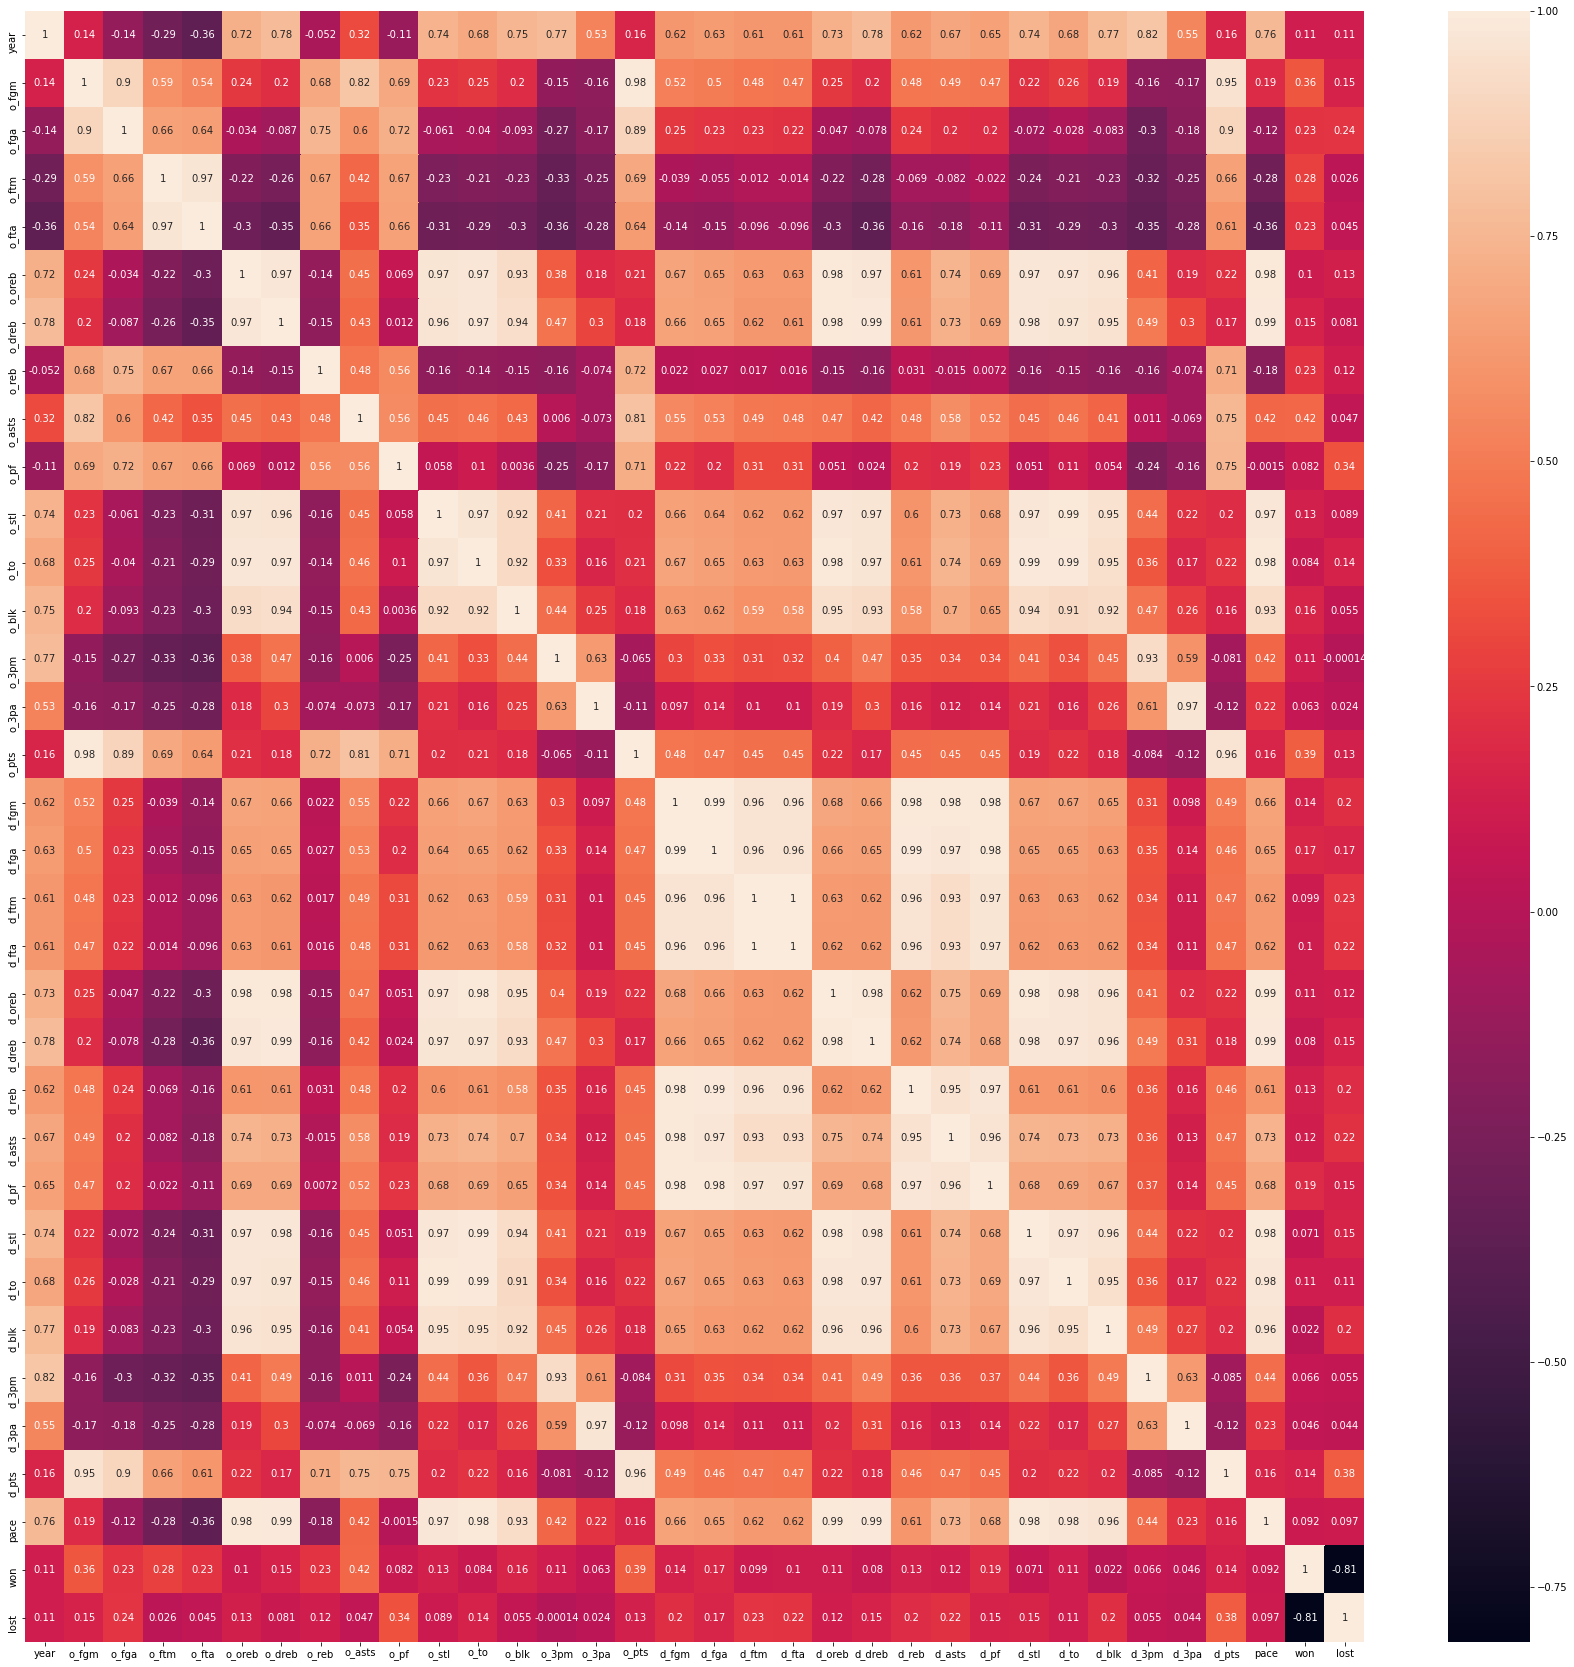

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot = True)

# Outlier Detection (Question 1)

In [ ]:
from pyod.utils.data import generate_data, get_outliers_inliers
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.svm import OneClassSVM
from numpy import where

In [ ]:
av_and_eff = X

av = X[:,0]
eff = X[:,1]

Text(0, 0.5, 'Efficiency')

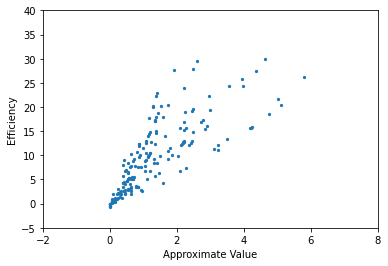

In [ ]:
# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

x_outliers, x_inliers = get_outliers_inliers(av,eff)

num_of_outliers = len(x_outliers)
num_of_inliers = len(x_inliers)

# scatter plot 
plt.scatter(av,eff,s=5)
plt.xlim((-2, 8))
plt.ylim((-5, 40))
plt.xlabel('Approximate Value')
plt.ylabel('Efficiency') 

Local Outlier Factor

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
y_pred = clf.fit_predict(av_and_eff)
X_scores = clf.negative_outlier_factor_

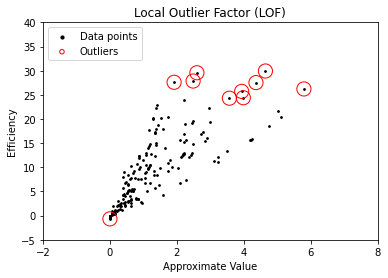

In [ ]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(av, eff, color='k', s=3, label='Data points')

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
radius_sorted = np.argsort(radius)

plt.scatter(av[radius_sorted[len(radius)-1]], eff[radius_sorted[len(radius)-1]], s=1000 * 0.2, edgecolors='r',facecolors='none',label='Outliers')
plt.scatter(av[radius_sorted[len(radius)-2]], eff[radius_sorted[len(radius)-2]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-3]], eff[radius_sorted[len(radius)-3]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-4]], eff[radius_sorted[len(radius)-4]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-5]], eff[radius_sorted[len(radius)-5]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-6]], eff[radius_sorted[len(radius)-6]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-7]], eff[radius_sorted[len(radius)-7]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-8]], eff[radius_sorted[len(radius)-8]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-9]], eff[radius_sorted[len(radius)-9]], s=1000 * 0.2, edgecolors='r',facecolors='none')
plt.scatter(av[radius_sorted[len(radius)-10]], eff[radius_sorted[len(radius)-10]], s=1000 * 0.2, edgecolors='r',facecolors='none')

plt.axis('tight')
plt.xlim((-2, 8))
plt.ylim((-5, 40))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.xlabel('Approximate Value')
plt.ylabel('Efficiency') 
plt.show()

Outlier Players

In [ ]:
print("10 outliers detected")
print()

for i in range(len(radius)-1,len(radius)-11,-1):
  print(data_for_year.iloc[radius_sorted[i]]['firstname'],data_for_year.iloc[radius_sorted[i]]['lastname'])

10 outliers detected

Amare Stoudemire
Tracy Mcgrady
Paul Pierce
Steve Nash
Allen Iverson
Tim Duncan
Dwyane Wade
Shawn Marion
Dirk Nowitzki
Steve Smith


K Nearest Neighbours

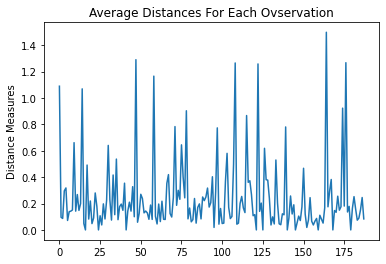

In [ ]:
# https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13

# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)

#Fit the model
nbrs.fit(av_and_eff)

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(av_and_eff)

# plot mean of k-distances of each observation
print("")
plt.title("Average Distances For Each Observation")
plt.ylabel('Distance Measures')
plt.plot(distances.mean(axis =1))

In [ ]:

# visually determine cutoff values > 0.8

# outlier_index = np.where(distances.mean(axis = 1) > 1)


outlier_index = np.where(distances.mean(axis = 1) > 1.2)

print(outlier_index)
# print("Outlier Indexes")
# print(outlier_index)

# print("")

# filter outlier values
outlier_values = av_and_eff[outlier_index]
# print("Outlier Values")
# print(outlier_values)
# print("")

# plt.scatter(indices[:1], indices[:1], color='k', s=3, label='Data points')

print(outlier_values)

(array([ 47, 108, 122, 164, 176]),)
[[ 5.79453632 26.2173913 ]
 [ 2.59871387 29.57142857]
 [ 4.36257839 27.53333333]
 [ 4.64478334 29.93333333]
 [ 4.74528375 18.48      ]]


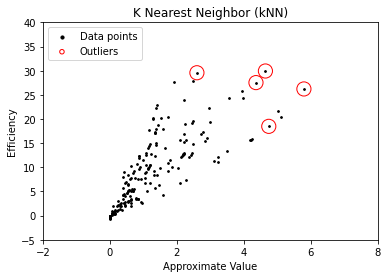

In [ ]:
plt.title("K Nearest Neighbor (kNN)")
plt.scatter(av, eff, color='k', s=3, label='Data points')

plt.scatter(outlier_values[:,0], outlier_values[:,1], s=1000 * 0.2, edgecolors='r',facecolors='none',label='Outliers')

plt.axis('tight')
plt.xlim((-2, 8))
plt.ylim((-5, 40))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.xlabel('Approximate Value')
plt.ylabel('Efficiency') 
plt.show()

Outlier Players

In [ ]:
print(outlier_index[0].shape)
print()

(5,)



In [ ]:
print(len(outlier_index[0]), "outliers detected")
print()

for i in range(len(outlier_index[0])):
  print(data_for_year.iloc[outlier_index[0][i]]['firstname'],data_for_year.iloc[outlier_index[0][i]]['lastname'])

5 outliers detected

Tim Duncan
Tracy Mcgrady
Steve Nash
Amare Stoudemire
Ben Wallace


Support Vector Machine (SVM)

In [ ]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(av_and_eff)

# prediction
y_pred_SVM = model.predict(av_and_eff)
y_pred_SVM

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [ ]:
# filter outlier index
outlier_index_SVM = where(y_pred_SVM == -1) 
print(outlier_index_SVM)

# get outlier values 
outlier_values_SVM = av_and_eff[outlier_index_SVM]

(array([ 16, 108, 125, 160, 164, 168]),)


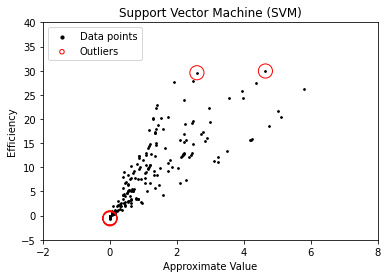

In [ ]:
plt.title("Support Vector Machine (SVM)")
plt.scatter(av, eff, color='k', s=3, label='Data points')

plt.scatter(outlier_values_SVM[:,0], outlier_values_SVM[:,1], s=1000 * 0.2, edgecolors='r',facecolors='none',label='Outliers')

plt.axis('tight')
plt.xlim((-2, 8))
plt.ylim((-5, 40))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.xlabel('Approximate Value')
plt.ylabel('Efficiency') 
plt.show()

Outlier Players

In [ ]:
print(len(outlier_index_SVM[0]), "outliers detected")
print()

for i in range(len(outlier_index_SVM[0])):
  print(data_for_year.iloc[outlier_index_SVM[0][i]]['firstname'],data_for_year.iloc[outlier_index_SVM[0][i]]['lastname'])

6 outliers detected

Mark Blount
Tracy Mcgrady
Moochie Norris
Steve Smith
Amare Stoudemire
Billy Thomas


# Game Prediction (Question 2)

In [6]:
team_season.tail(10)

team  year leag  o_fgm  o_fga  ...  d_3pa  d_pts       pace  won  lost
1177  ORL  2004    N   3034   6679  ...   1291   8344  97.333916   36    46
1178  PHI  2004    N   2946   6736  ...   1560   8189  97.401680   43    39
1179  PHO  2004    N   3351   7018  ...   1476   8470  98.476440   62    20
1180  POR  2004    N   2896   6422  ...   1283   7949  92.568474   27    55
1181  SAC  2004    N   3203   6978  ...   1318   8328  96.841805   50    32
1182  SAS  2004    N   2923   6450  ...    881   7248  91.455696   59    23
1183  SEA  2004    N   2882   6498  ...   1317   7925  91.244949   52    30
1184  TOR  2004    N   2952   6656  ...   1222   8311  95.012611   33    49
1185  UTA  2004    N   2828   6301  ...   1297   7975  91.195145   26    56
1186  WAS  2004    N   2966   6794  ...   1432   8268  96.008492   45    37

[10 rows x 36 columns]

Calculating Percentages

In [7]:
data_with_percentages = team_season[(team_season["year"] >= 1999)].copy()

data_with_percentages.loc[:,"win_percentage"] = (((data_with_percentages["won"]/(data_with_percentages["won"]+data_with_percentages["lost"]))*100))

data_with_percentages.loc[:,"o_fg_percentage"] = ((data_with_percentages["o_fgm"]/data_with_percentages["o_fga"])*100)
data_with_percentages.loc[:,"o_3p_percentage"] = ((data_with_percentages["o_3pm"]/data_with_percentages["o_3pa"])*100)
                                                                          
data_with_percentages.loc[:,"d_fg_percentage"] = ((data_with_percentages["d_fgm"]/data_with_percentages["d_fga"])*100)
data_with_percentages.loc[:,"d_3p_percentage"] = ((data_with_percentages["d_3pm"]/data_with_percentages["d_3pa"])*100)
data_with_percentages.tail(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1177  ORL  2004    N  ...        34.934498        45.136244        34.314485
1178  PHI  2004    N  ...        34.755678        44.273194        36.217949
1179  PHO  2004    N  ...        39.289240        44.462258        33.468835
1180  POR  2004    N  ...        36.175711        44.665303        34.294622
1181  SAC  2004    N  ...        37.392550        45.901167        35.735964
1182  SAS  2004    N  ...        36.344086        42.648215        36.662883
1183  SEA  2004    N  ...        36.513158        45.941711        35.687168
1184  TOR  2004    N  ...        38.548483        46.705426        35.597381
1185  UTA  2004    N  ...        32.808399        45.783738        37.471087
1186  WAS  2004    N  ...        34.312417        45.924718        36.382682

[10 rows x 41 columns]

In [8]:
log_data = data_with_percentages.copy() 
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    log_data[cols] = np.log(log_data[cols])
log_data.tail(10)    

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1177  ORL  2004    N  ...         3.553475         3.809686         3.535568
1178  PHI  2004    N  ...         3.548343         3.790379         3.589555
1179  PHO  2004    N  ...         3.670951         3.794641         3.510615
1180  POR  2004    N  ...         3.588388         3.799197         3.534989
1181  SAC  2004    N  ...         3.621471         3.826491         3.576158
1182  SAS  2004    N  ...         3.593031         3.752985         3.601765
1183  SEA  2004    N  ...         3.597673         3.827373         3.574791
1184  TOR  2004    N  ...         3.651917         3.843860         3.572272
1185  UTA  2004    N  ...         3.490685         3.823929         3.623570
1186  WAS  2004    N  ...         3.535507         3.827004         3.594093

[10 rows x 41 columns]

Normalizing Data

In [9]:
normalized_data = data_with_percentages.copy()
for cols in normalized_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    normalized_data[cols] = (normalized_data[cols] - normalized_data[cols].mean())/normalized_data[cols].std()

normalized_log_data = log_data.copy()
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    normalized_log_data[cols] = (normalized_log_data[cols] - normalized_log_data[cols].mean())/normalized_log_data[cols].std()

In [10]:
normalized_data.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.555495         0.753637         0.963733
1013  BOS  1999    N  ...        -0.890967         1.785918         0.546291
1014  CHA  1999    N  ...        -0.544020         0.241643         1.591085
1015  CHI  1999    N  ...        -0.957985         0.830324        -0.673283
1016  CLE  1999    N  ...         1.047870        -0.071649        -0.609522
1017  DAL  1999    N  ...         1.913439         0.924410        -0.432490
1018  DEN  1999    N  ...        -0.647745         0.417590         0.143298
1019  DET  1999    N  ...         0.401479         1.474896         1.173746
1020  GSW  1999    N  ...        -1.258075         1.618783         0.962621
1021  HOU  1999    N  ...         0.345809         0.839173         0.092312

[10 rows x 41 columns]

In [11]:
normalized_log_data.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157
1017  DAL  1999    N  ...         1.822951         0.925034        -0.412516
1018  DEN  1999    N  ...        -0.624238         0.429932         0.164919
1019  DET  1999    N  ...         0.423436         1.454000         1.161783
1020  GSW  1999    N  ...        -1.266426         1.590790         0.961201
1021  HOU  1999    N  ...         0.369521         0.842318         0.114398

[10 rows x 41 columns]

Obtaining Training and Testing Data

In [12]:
train = normalized_data[(normalized_data["year"] >= 1999) & (normalized_data["year"] < 2003)]
train.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.555495         0.753637         0.963733
1013  BOS  1999    N  ...        -0.890967         1.785918         0.546291
1014  CHA  1999    N  ...        -0.544020         0.241643         1.591085
1015  CHI  1999    N  ...        -0.957985         0.830324        -0.673283
1016  CLE  1999    N  ...         1.047870        -0.071649        -0.609522
1017  DAL  1999    N  ...         1.913439         0.924410        -0.432490
1018  DEN  1999    N  ...        -0.647745         0.417590         0.143298
1019  DET  1999    N  ...         0.401479         1.474896         1.173746
1020  GSW  1999    N  ...        -1.258075         1.618783         0.962621
1021  HOU  1999    N  ...         0.345809         0.839173         0.092312

[10 rows x 41 columns]

In [13]:
test = normalized_data[normalized_data["year"] == 2003]
test.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1128  ATL  2003    N  ...        -0.680270        -0.259894         0.393914
1129  BOS  2003    N  ...        -0.209480        -0.516276         0.608448
1130  CHI  2003    N  ...        -0.408934        -0.569424         0.194906
1131  CLE  2003    N  ...        -1.681484        -0.471105         1.177619
1132  DAL  2003    N  ...        -0.098905         1.054969         0.684592
1133  DEN  2003    N  ...        -0.666132         0.638078         0.250032
1134  DET  2003    N  ...        -0.311424        -2.189610        -3.145488
1135  GSW  2003    N  ...        -0.743853         0.040768         1.369457
1136  HOU  2003    N  ...         0.743200        -2.278759         1.273860
1137  IND  2003    N  ...         0.007942        -0.826632        -1.723799

[10 rows x 41 columns]

In [14]:
train_log = normalized_log_data[(normalized_log_data["year"] >= 1999) & (normalized_log_data["year"] < 2003)]
train_log.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157
1017  DAL  1999    N  ...         1.822951         0.925034        -0.412516
1018  DEN  1999    N  ...        -0.624238         0.429932         0.164919
1019  DET  1999    N  ...         0.423436         1.454000         1.161783
1020  GSW  1999    N  ...        -1.266426         1.590790         0.961201
1021  HOU  1999    N  ...         0.369521         0.842318         0.114398

[10 rows x 41 columns]

In [15]:
test_log = normalized_log_data[normalized_log_data["year"] == 2003]
test_log.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1128  ATL  2003    N  ...        -0.657825        -0.244461         0.411575
1129  BOS  2003    N  ...        -0.178338        -0.503541         0.620535
1130  CHI  2003    N  ...        -0.379744        -0.557520         0.215940
1131  CLE  2003    N  ...        -1.727408        -0.457737         1.165446
1132  DAL  2003    N  ...        -0.067752         1.051307         0.694223
1133  DEN  2003    N  ...        -0.643216         0.646293         0.270306
1134  DET  2003    N  ...        -0.280966        -2.249734        -3.359031
1135  GSW  2003    N  ...        -0.723686         0.056638         1.346095
1136  HOU  2003    N  ...         0.750504        -2.345577         1.256260
1137  IND  2003    N  ...         0.038392        -0.820082        -1.765686

[10 rows x 41 columns]

Drawing the correlation matrix

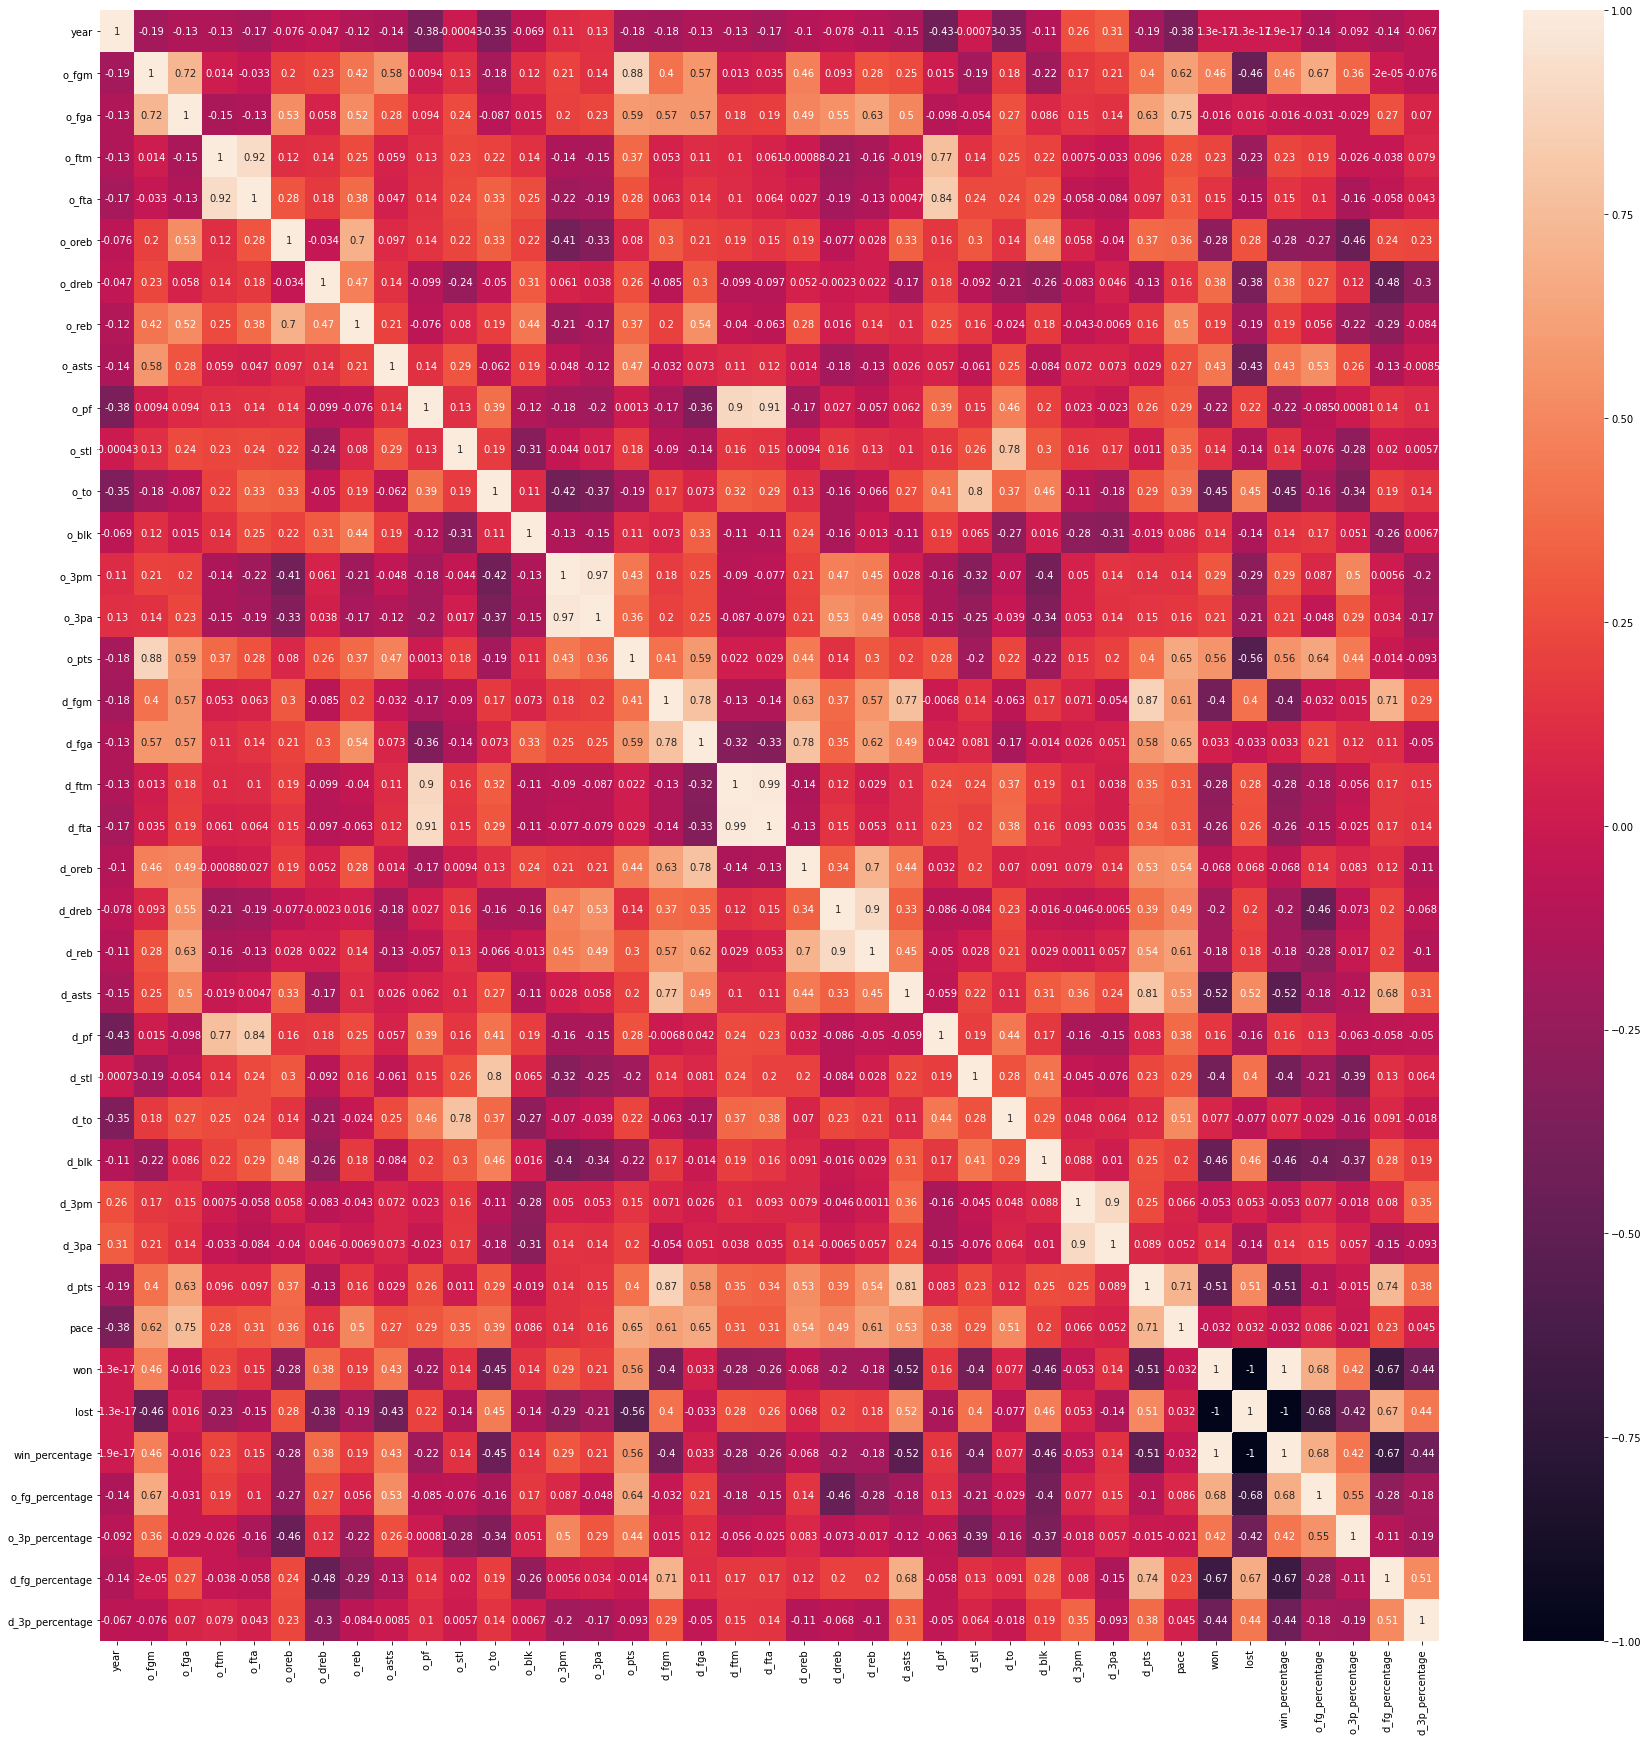

In [16]:
train_data_correlation = train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(train_data_correlation, annot = True)

Dropping Columns

In [17]:
dropped_train_Columns = train.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
dropped_test_Columns = test.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
dropped_trainLog_Columns = train_log.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
dropped_testLog_Columns = test_log.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
dropped_train_Columns.head(10)

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.555495         0.753637         0.963733
1013  BOS  1999    N  ...        -0.890967         1.785918         0.546291
1014  CHA  1999    N  ...        -0.544020         0.241643         1.591085
1015  CHI  1999    N  ...        -0.957985         0.830324        -0.673283
1016  CLE  1999    N  ...         1.047870        -0.071649        -0.609522
1017  DAL  1999    N  ...         1.913439         0.924410        -0.432490
1018  DEN  1999    N  ...        -0.647745         0.417590         0.143298
1019  DET  1999    N  ...         0.401479         1.474896         1.173746
1020  GSW  1999    N  ...        -1.258075         1.618783         0.962621
1021  HOU  1999    N  ...         0.345809         0.839173         0.092312

[10 rows x 31 columns]

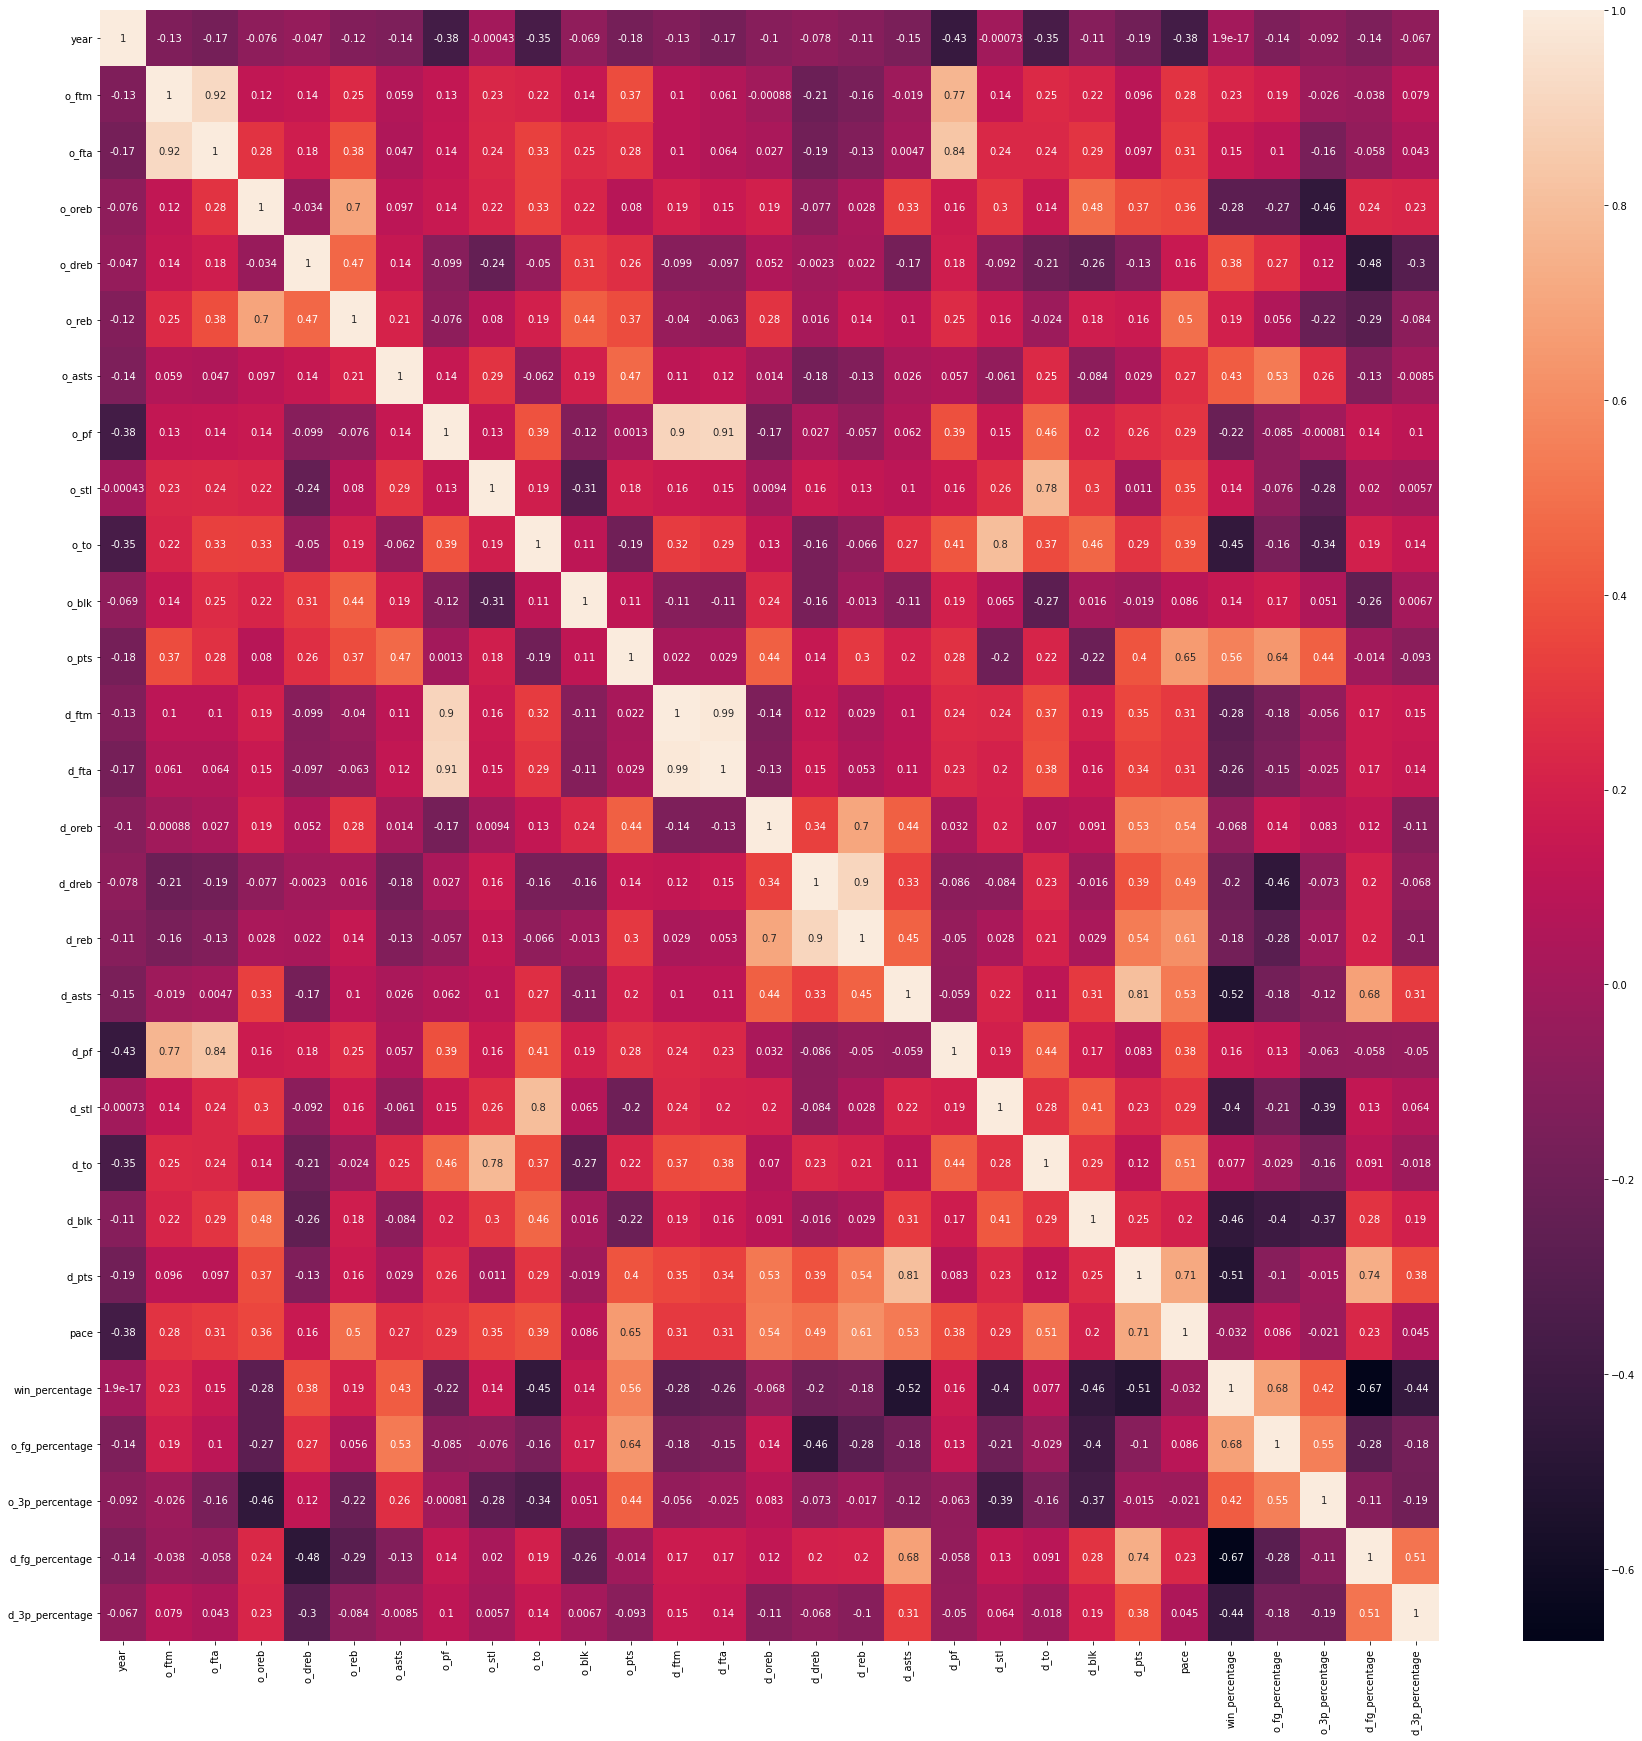

In [45]:
correlation_dropped = dropped_train_Columns.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_dropped, annot = True)
plt.savefig('DroppedCorrelation.jpg')

Scatter Plot Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76896e3710>,
      dtype=object)

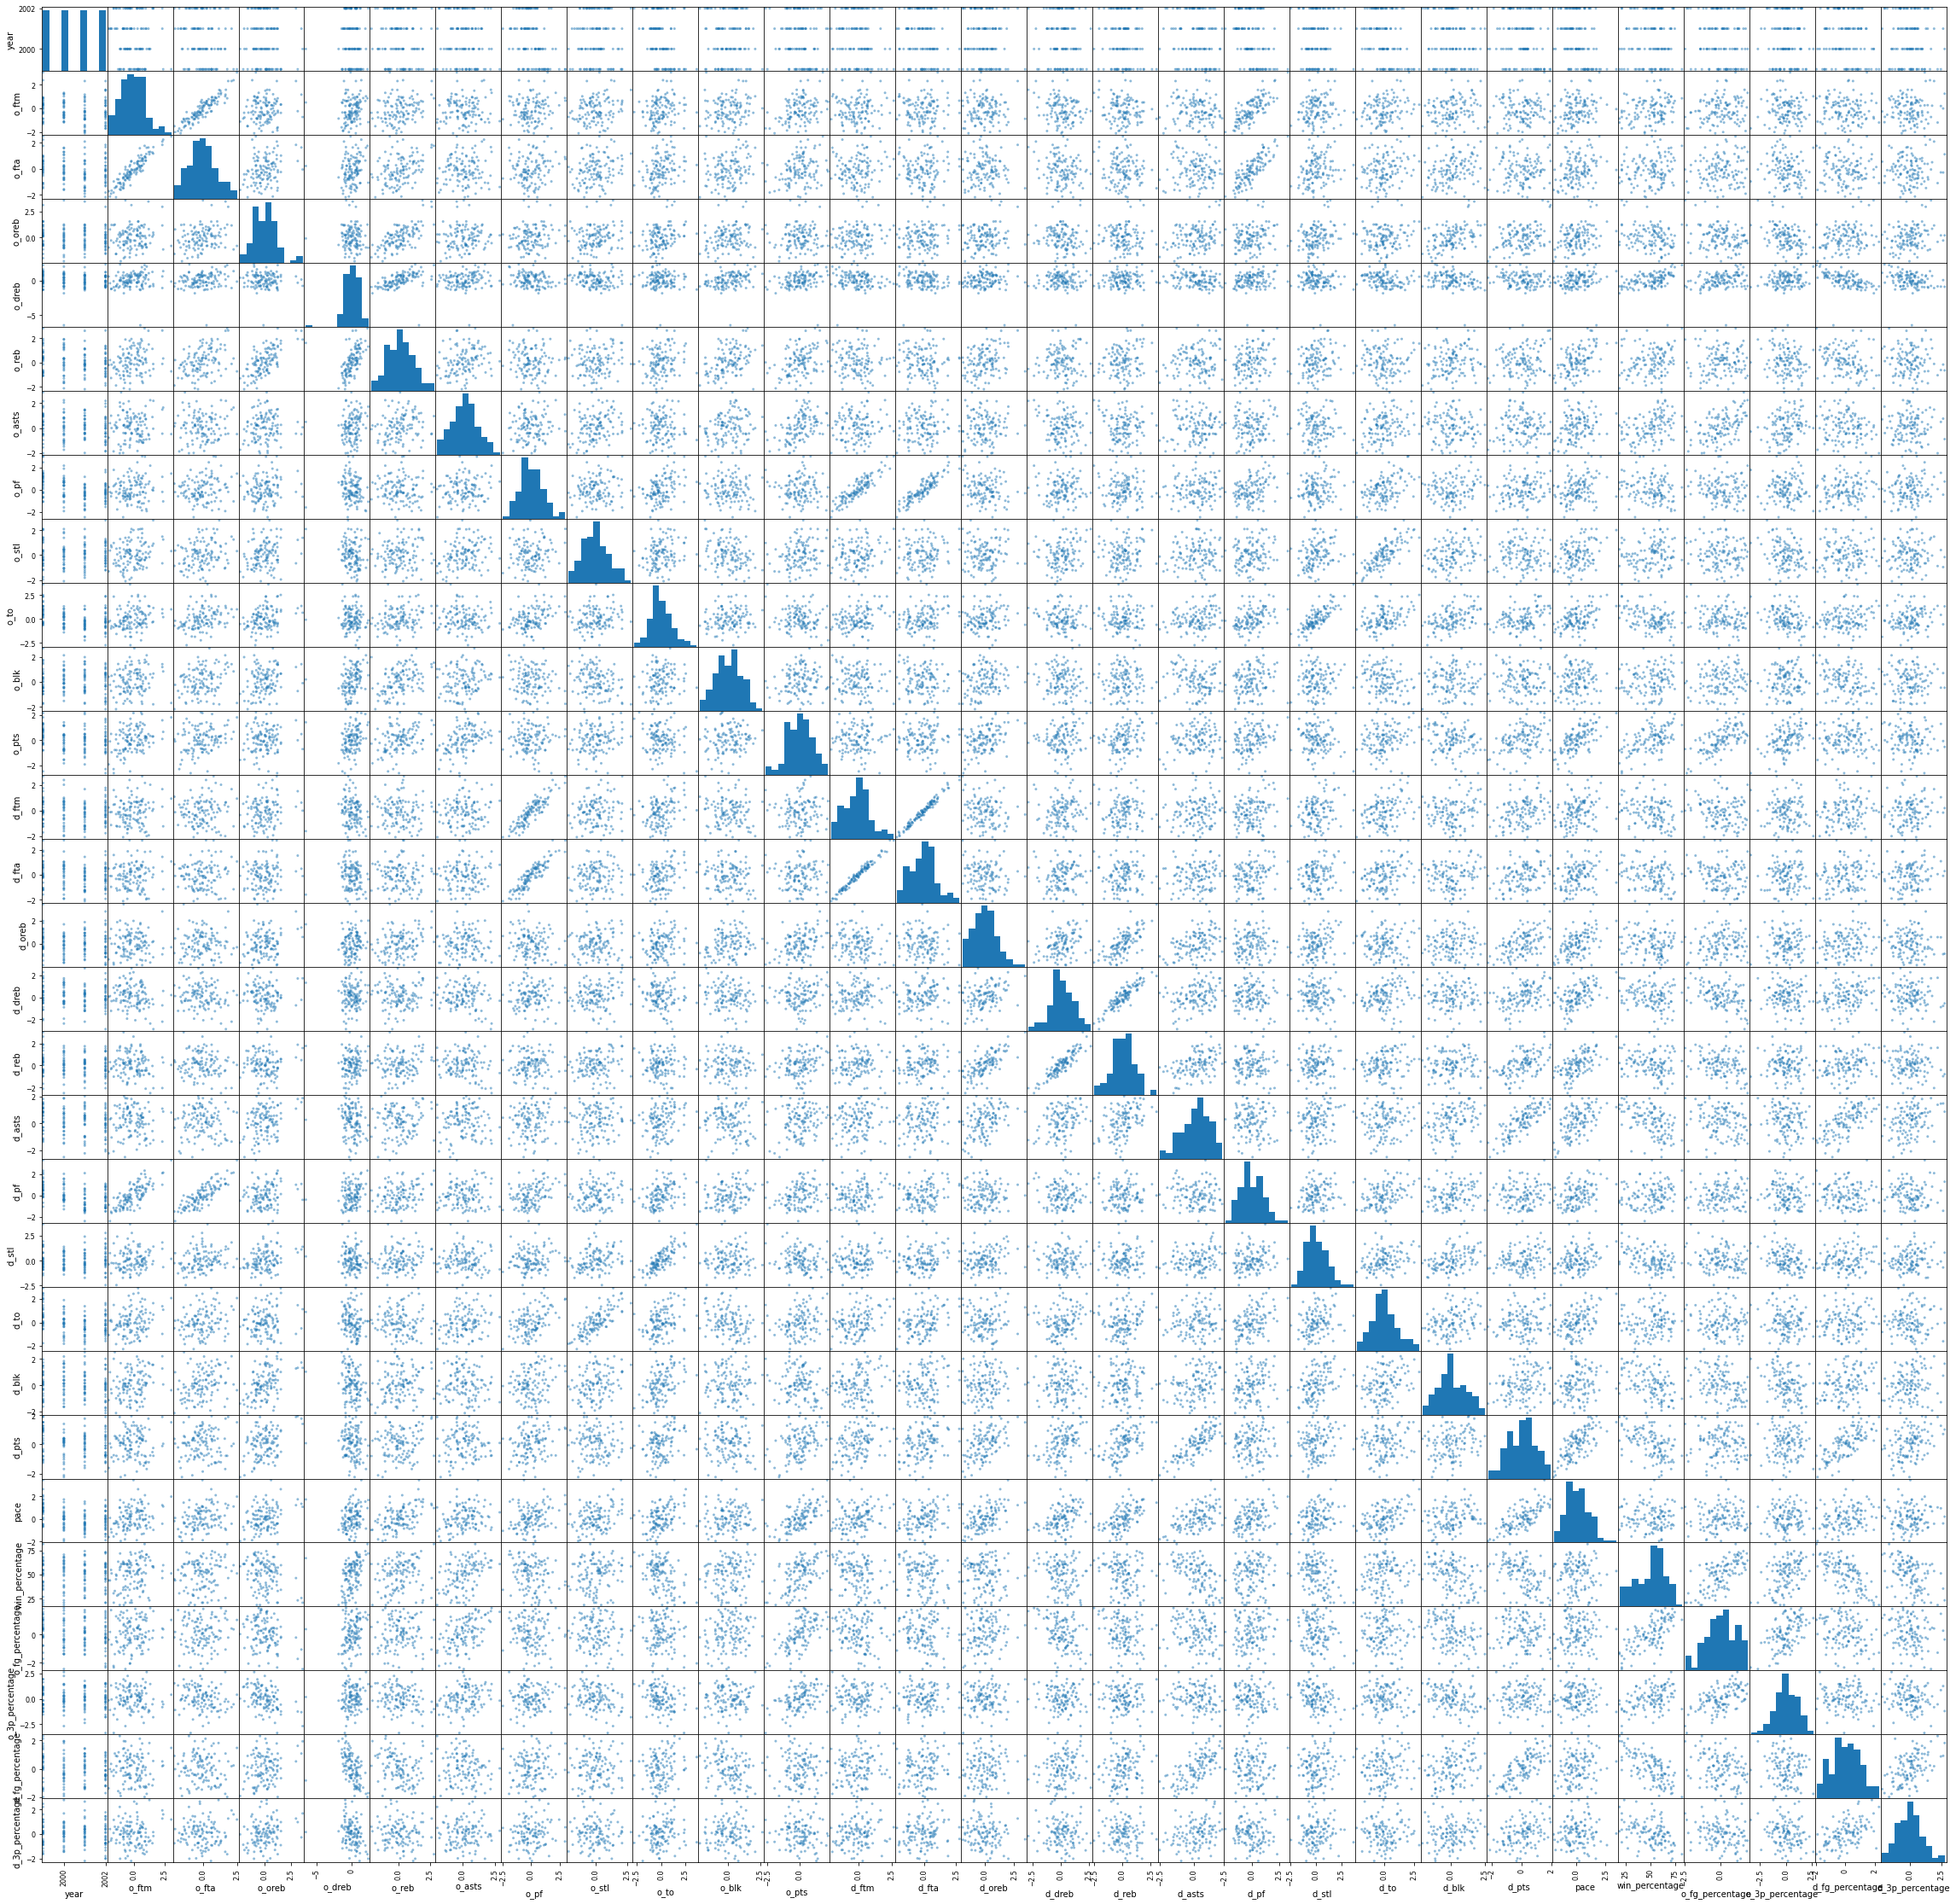

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(dropped_train_Columns,figsize  = [40, 40])

OLS Tables - https://heartbeat.fritz.ai/implementing-ordinary-least-squares-ols-using-statsmodels-in-python-b1f4dee09419

https://medium.com/analytics-vidhya/understanding-the-p-value-in-regression-1fc2cd2568af

Low p-values are preffered as they show the correlation between independant and dependant variable

Using Original Normalized Data on OLS Table

In [20]:
import statsmodels.formula.api as smf
model = smf.ols(formula="win_percentage ~ o_ftm+o_fta+o_oreb+o_dreb+o_reb+o_asts+o_pf+o_stl+o_to+o_blk+o_pts+d_ftm+d_fta+d_oreb+d_dreb+d_reb+d_asts+d_pf+d_stl+d_to+d_blk+d_pts+pace+o_fg_percentage+o_3p_percentage+d_fg_percentage+d_3p_percentage",data=dropped_train_Columns)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     81.12
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           4.84e-51
Time:                        20:07:27   Log-Likelihood:                -288.22
No. Observations:                 116   AIC:                             632.4
Df Residuals:                      88   BIC:                             709.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          49.9893      0.379    1

Checking multicollinearity with Variance Inflation Factor

https://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

(Multicolinearity - features that are "redundant" or are correlated to other features)

If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. The output above shows that the VIF for the Publication and Years factors are about 1.5, which indicates some correlation, but not enough to be overly concerned about. A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
x_vif = dropped_train_Columns[["o_ftm","o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]]
vif_data["Features"] = x_vif.columns

vif_data["VIF"] = [variance_inflation_factor(x_vif.values,i) for i in range(len(x_vif.columns))]

print(vif_data)

           Features            VIF
0             o_ftm      19.215088
1             o_fta      23.361664
2            o_oreb      31.351322
3            o_dreb       2.222588
4             o_reb      38.653372
5            o_asts       2.734135
6              o_pf      16.560904
7             o_stl       8.243114
8              o_to      20.166361
9             o_blk       2.471053
10            o_pts      30.341988
11            d_ftm      99.016195
12            d_fta      70.128589
13           d_oreb   22385.171738
14           d_dreb   62187.094762
15            d_reb  110048.419085
16           d_asts       5.939586
17             d_pf      12.713703
18            d_stl       5.218325
19             d_to      29.482358
20            d_blk       2.445566
21            d_pts     122.540715
22             pace      94.093645
23  o_fg_percentage      18.722727
24  o_3p_percentage       2.771317
25  d_fg_percentage      33.402791
26  d_3p_percentage       2.422013


Removing features with correlation greater that 3

In [22]:
vif_data_new = pd.DataFrame()
x_vif_new = dropped_train_Columns[["o_dreb", "o_asts" ,"o_blk", "d_blk","o_3p_percentage","d_3p_percentage"]]
vif_data_new["Features"] = x_vif_new.columns

vif_data_new["VIF"] = [variance_inflation_factor(x_vif_new.values,i) for i in range(len(x_vif_new.columns))]

print(vif_data_new)

          Features       VIF
0           o_dreb  1.309186
1           o_asts  1.125389
2            o_blk  1.169489
3            d_blk  1.246433
4  o_3p_percentage  1.264727
5  d_3p_percentage  1.150294


Creating OLS Table with low multicollinarity 

In [23]:
model = smf.ols(formula="win_percentage ~ o_dreb+o_asts+o_blk+d_blk+o_3p_percentage+d_3p_percentage",data=dropped_train_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     20.30
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           7.85e-16
Time:                        20:07:28   Log-Likelihood:                -433.42
No. Observations:                 116   AIC:                             880.8
Df Residuals:                     109   BIC:                             900.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          49.7726      0.988     

Removing high p-values

In [24]:
best_normal_model = smf.ols(formula="win_percentage ~ o_dreb+o_asts+d_blk+o_3p_percentage+d_3p_percentage",data=dropped_train_Columns)
best_normal_result = best_normal_model.fit()
print(best_normal_result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     24.49
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.66e-16
Time:                        20:07:28   Log-Likelihood:                -433.54
No. Observations:                 116   AIC:                             879.1
Df Residuals:                     110   BIC:                             895.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          49.7872      0.984     

Removing high p-values | Not as good as previous model

In [25]:
model = smf.ols(formula="win_percentage ~ o_asts+d_blk+d_3p_percentage",data=dropped_train_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     35.86
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.55e-16
Time:                        20:07:28   Log-Likelihood:                -437.89
No. Observations:                 116   AIC:                             883.8
Df Residuals:                     112   BIC:                             894.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.0184      1.008     

Checking for Normal Distribution

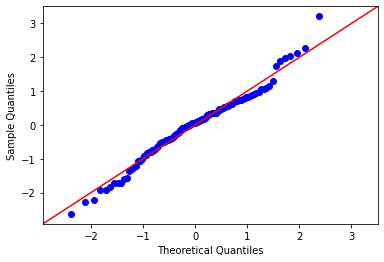

In [26]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(best_normal_result.resid, dist=stats.norm, line='45', fit=True)

Checking for homoskedasticity

This is done to ensure model is well defined

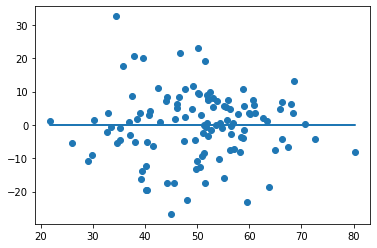

In [27]:
plt.scatter(best_normal_result.predict(), best_normal_result.resid)
plt.plot(best_normal_result.predict(), [0 for i in range(len(dropped_train_Columns))])
# There should be no pattern

Obtaining Model Equation

In [28]:
print(best_normal_result.params)

Intercept          49.787194
o_dreb              2.085824
o_asts              4.989319
d_blk              -3.867689
o_3p_percentage     2.186196
d_3p_percentage    -4.590136
dtype: float64


Model Equation :

win_percentage =  49.787194 + 2.085824(o_dreb) + 4.989319(o_asts) - 3.867689(d_blk) + 2.186196(o_3p_percentage) - 4.590136(d_3p_percentage)

Testing The Model

In [29]:
import sklearn

y_evaluate = normalized_data[normalized_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = dropped_test_Columns.copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[["o_dreb","o_asts","d_blk","o_3p_percentage","d_3p_percentage"]]

print(sklearn.metrics.mean_squared_error(y_evaluate, best_normal_result.predict(x_test)))
print()
print(y_evaluate)
print()
print(best_normal_result.predict(x_test))

260.8923583731541

0     15.853659
1     54.878049
2     57.317073
3     51.219512
4     70.731707
5     59.756098
6     65.853659
7     41.463415
8     62.195122
9     53.658537
10    45.121951
11    41.463415
12    54.878049
13    71.951220
14    36.585366
15    53.658537
16    51.219512
17    21.951220
18    40.243902
19    43.902439
20    52.439024
21    75.609756
22    32.926829
23    60.975610
24    71.951220
25    63.414634
26    40.243902
27    31.707317
28    54.878049
Name: win_percentage_y, dtype: float64

0     43.271052
1     43.445733
2     47.640139
3     43.184804
4     56.197111
5     41.982122
6     61.819344
7     39.702735
8     45.946362
9     50.698109
10    38.021775
11    66.055222
12    52.698468
13    44.171685
14    54.338609
15    71.238787
16    59.472390
17    45.787960
18    55.955435
19    31.309269
20    45.434704
21    41.667808
22    52.192504
23    71.861190
24    60.273473
25    52.599960
26    61.181156
27    34.425287
28    40.097330
dtype: float6

Using Log Transform Data on OLS Table

In [30]:
import statsmodels.formula.api as smf
model = smf.ols(formula="win_percentage ~ o_ftm+o_fta+o_oreb+o_dreb+o_reb+o_asts+o_pf+o_stl+o_to+o_blk+o_pts+d_ftm+d_fta+d_oreb+d_dreb+d_reb+d_asts+d_pf+d_stl+d_to+d_blk+d_pts+pace+o_fg_percentage+o_3p_percentage+d_fg_percentage+d_3p_percentage",data=dropped_trainLog_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     75.90
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           7.77e-50
Time:                        20:07:28   Log-Likelihood:                -291.92
No. Observations:                 116   AIC:                             639.8
Df Residuals:                      88   BIC:                             716.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.0123      0.398    1

Removed p-values > 0.5

In [31]:
model = smf.ols(formula="win_percentage ~ o_fta+o_oreb+o_reb+o_asts+o_to+o_pts+d_fta+d_oreb+d_reb+d_asts+d_stl+d_pts+pace+o_3p_percentage+d_fg_percentage+d_3p_percentage",data=dropped_trainLog_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           9.10e-60
Time:                        20:07:29   Log-Likelihood:                -295.36
No. Observations:                 116   AIC:                             624.7
Df Residuals:                      99   BIC:                             671.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.0971      0.330    1

Removed p-values > 0.5

In [32]:
model = smf.ols(formula="win_percentage ~ o_fta+o_oreb+o_reb+o_asts+o_to+o_pts+d_fta+d_oreb+d_reb+d_stl+d_pts+pace+o_3p_percentage+d_fg_percentage+d_3p_percentage",data=dropped_trainLog_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           7.39e-61
Time:                        20:07:29   Log-Likelihood:                -295.36
No. Observations:                 116   AIC:                             622.7
Df Residuals:                     100   BIC:                             666.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.0981      0.326    1

Removing p-values > 0.1 

In [33]:
model = smf.ols(formula="win_percentage ~ o_oreb+o_reb+o_pts+d_oreb+d_stl+d_pts+pace+d_fg_percentage",data=dropped_trainLog_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.55e-67
Time:                        20:07:29   Log-Likelihood:                -299.20
No. Observations:                 116   AIC:                             616.4
Df Residuals:                     107   BIC:                             641.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.1513      0.318    1

Removed p-values > 0.1

In [34]:
model = smf.ols(formula="win_percentage ~ o_reb+o_pts+d_pts+pace+d_fg_percentage",data=dropped_trainLog_Columns)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     438.3
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           6.89e-71
Time:                        20:07:29   Log-Likelihood:                -300.58
No. Observations:                 116   AIC:                             613.2
Df Residuals:                     110   BIC:                             629.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.1334      0.313    1

Removed p-values > 0.01

In [35]:
best_log_model = smf.ols(formula="win_percentage ~ o_pts+d_pts+pace+d_fg_percentage",data=dropped_trainLog_Columns)
best_log_result = best_log_model.fit()
print(best_log_result.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     544.6
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           6.04e-72
Time:                        20:07:29   Log-Likelihood:                -301.40
No. Observations:                 116   AIC:                             612.8
Df Residuals:                     111   BIC:                             626.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.0960      0.312    1

In [157]:
best_log_model = smf.ols(formula="win_percentage ~ o_pts+d_pts",data=dropped_trainLog_Columns)
best_log_model = best_log_model.fit()
print(best_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1076.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.71e-74
Time:                        20:54:50   Log-Likelihood:                -303.05
No. Observations:                 116   AIC:                             612.1
Df Residuals:                     113   BIC:                             620.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.0329      0.311    161.090      0.0

Checking for normal distribution

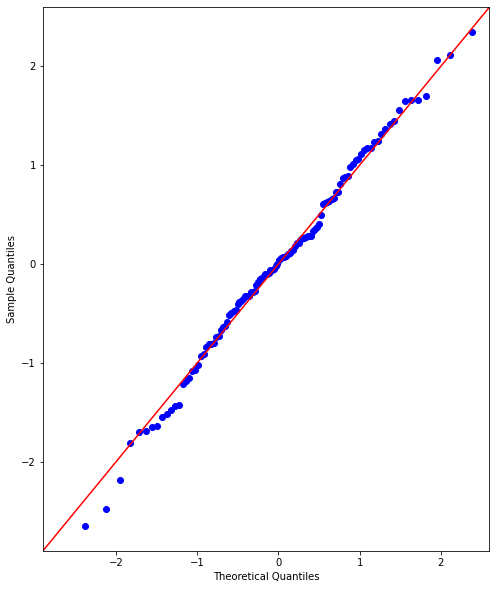

In [158]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(best_log_model.resid, dist=stats.norm, line='45', fit=True)

Checking for homoskedasticity

This is done to ensure model is well defined

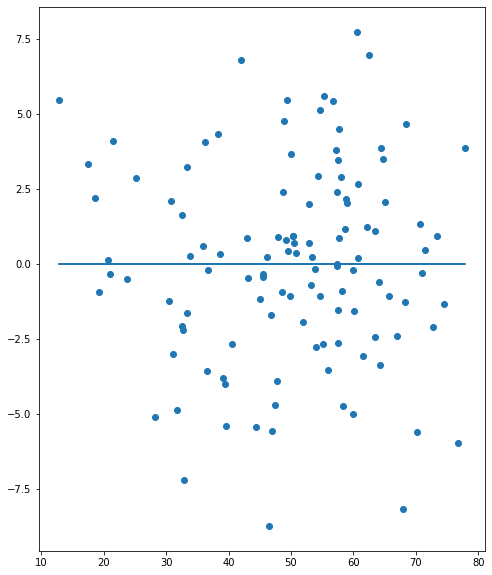

In [159]:
plt.scatter(best_log_model.predict(), best_log_model.resid)
plt.plot(best_log_model.predict(), [0 for i in range(len(dropped_trainLog_Columns))])
# There should be no pattern

Obtaining model equation

In [160]:
print(best_log_model.params)

Intercept    50.032865
o_pts        14.096406
d_pts       -14.161025
dtype: float64


Model Equation :

win_percentage = 50.032865 + 14.096406
(o_pts) - -14.161025(d_pts) 

Testing the model

In [164]:
import sklearn

# x__log_test = dropped_testLog_Columns[["o_pts","d_pts","pace","d_fg_percentage"]]
# y_log_test = dropped_testLog_Columns["win_percentage"]



y_log_test = normalized_log_data[normalized_log_data["year"] == 2004].copy()
y_log_test = y_log_test[["team","win_percentage"]]

x__log_test = dropped_testLog_Columns.copy()
x__log_test = pd.merge(left=x__log_test, right=y_log_test, left_on='team', right_on='team')

y_log_test = x__log_test["win_percentage_y"]
x__log_test = x__log_test[["o_pts","d_pts"]]



print(sklearn.metrics.mean_squared_error(y_log_test, best_log_model.predict(x__log_test)))
print()
print(y_log_test)
print()
print(best_log_model.predict(x__log_test))

249.96859464643723

0     15.853659
1     54.878049
2     57.317073
3     51.219512
4     70.731707
5     59.756098
6     65.853659
7     41.463415
8     62.195122
9     53.658537
10    45.121951
11    41.463415
12    54.878049
13    71.951220
14    36.585366
15    53.658537
16    51.219512
17    21.951220
18    40.243902
19    43.902439
20    52.439024
21    75.609756
22    32.926829
23    60.975610
24    71.951220
25    63.414634
26    40.243902
27    31.707317
28    54.878049
Name: win_percentage_y, dtype: float64

0     34.713243
1     45.257164
2     28.710110
3     41.380817
4     63.114956
5     53.452845
6     71.700014
7     47.711235
8     56.621517
9     70.984724
10    35.086961
11    62.741683
12    58.073279
13    52.252234
14    53.329887
15    69.093613
16    59.322813
17    49.956212
18    45.228316
19    27.264782
20    41.711843
21    37.752424
22    45.961364
23    65.434938
24    76.423125
25    47.867865
26    39.751124
27    46.178738
28    31.380851
dtype: float

In [40]:
# from sklearn.linear_model import LinearRegression
# lin = LinearRegression()

# x_log_train = dropped_trainLog_Columns[["o_pts","d_pts","pace","d_fg_percentage"]]
# y_log_train = dropped_trainLog_Columns["win_percentage"]

# x_log_test = dropped_testLog_Columns[["o_pts","d_pts","pace","d_fg_percentage"]]
# y_log_test = dropped_testLog_Columns["win_percentage"]

# lin.fit(x_log_train,y_log_train)

# print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))

# print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

# y_h_lin_train = lin.predict(y_log_train)
# y_h_lin_test = lin.predict(x_log_test)


# print(y_h_lin_train.shape)
# print(y_h_lin_test.shape)

# print('Train Error Unpenalized Linear Model', np.sum((x_log_test - lin.predict(y_log_train))**2)/522)
# print('Test Error Unpenalized Linear Model', np.sum((y_log_test - lin.predict(x_log_test))**2)/131)

# Feature Selection

In [61]:
full_data = team_season[(team_season["year"] >= 1999)].copy()

full_data.loc[:,"win_percentage"] = (((full_data["won"]/(full_data["won"]+full_data["lost"]))*100))

full_data.loc[:,"o_fg_percentage"] = ((full_data["o_fgm"]/full_data["o_fga"])*100)
full_data.loc[:,"o_3p_percentage"] = ((full_data["o_3pm"]/full_data["o_3pa"])*100)
                                                                          
full_data.loc[:,"d_fg_percentage"] = ((full_data["d_fgm"]/full_data["d_fga"])*100)
full_data.loc[:,"d_3p_percentage"] = ((full_data["d_3pm"]/full_data["d_3pa"])*100)

data_with_percentages = full_data[(full_data["year"] >= 1999) & (full_data["year"] < 2003)].copy()
data_with_percentages = data_with_percentages.drop(["won","lost","o_fgm","o_3pm","d_fgm","d_3pm","o_fga","o_3pa","d_fga","d_3pa"],axis=1)
data_with_percentages.tail()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1123  SAS  2002    N  ...        35.354331        42.697300        33.940556
1124  SEA  2002    N  ...        35.321456        44.691781        34.427425
1125  TOR  2002    N  ...        34.283319        46.070995        37.525355
1126  UTA  2002    N  ...        34.945398        43.350142        34.932054
1127  WAS  2002    N  ...        31.196054        44.213923        36.151369

[5 rows x 31 columns]

Unormalized Data


In [62]:
original_data = data_with_percentages.copy()
original_data.tail()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1123  SAS  2002    N  ...        35.354331        42.697300        33.940556
1124  SEA  2002    N  ...        35.321456        44.691781        34.427425
1125  TOR  2002    N  ...        34.283319        46.070995        37.525355
1126  UTA  2002    N  ...        34.945398        43.350142        34.932054
1127  WAS  2002    N  ...        31.196054        44.213923        36.151369

[5 rows x 31 columns]

plot pearson heatmap and see correlation of independent variables WITH the output variable

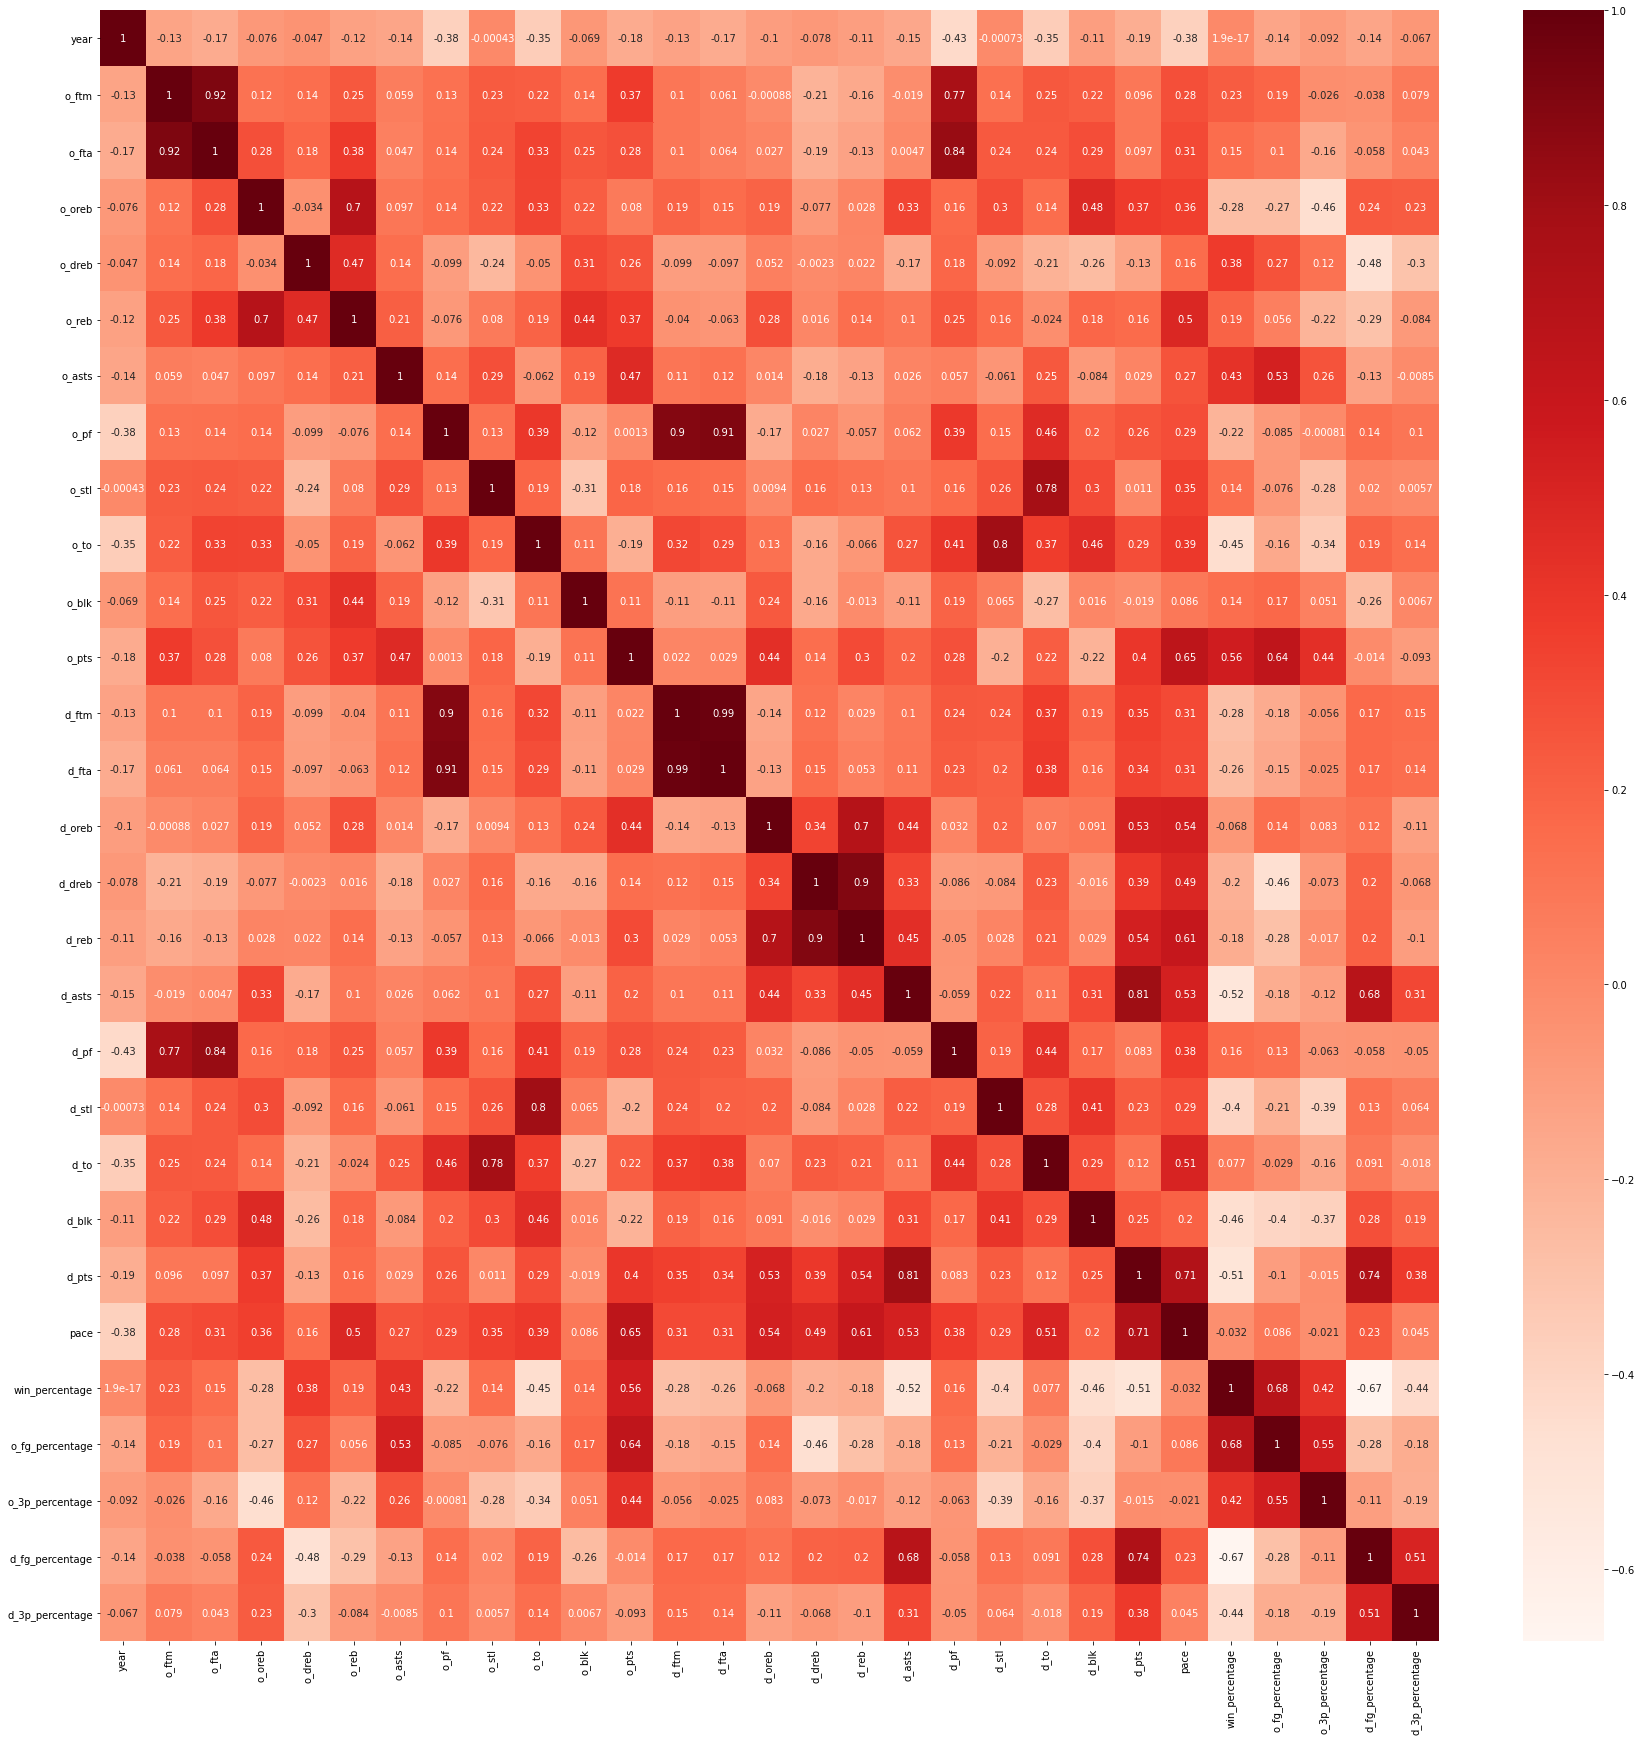

In [63]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
orig_cor = original_data.corr()
sns.heatmap(orig_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [64]:
# check the correlation with the output variable 
cor_orig_target = abs(orig_cor["win_percentage"])
#Selecting highly correlated features
relevant_features = cor_orig_target[cor_orig_target>=0.5]
relevant_features

o_pts              0.558632
d_asts             0.522543
d_pts              0.505037
win_percentage     1.000000
o_fg_percentage    0.684755
d_fg_percentage    0.674347
Name: win_percentage, dtype: float64

In [65]:
# we can now drop all other features 
# first check if the other features are uncorrelated (this is a requirement for
# linear regression)
print(original_data[["o_pts","d_asts"]].corr())
print()

print(original_data[["o_pts","d_pts"]].corr())
print()

print(original_data[["o_pts","o_fg_percentage"]].corr())
print()

print(original_data[["o_pts","d_fg_percentage"]].corr())
print()

print(original_data[["d_asts","d_fg_percentage"]].corr())
print()

print(original_data[["d_asts","o_fg_percentage"]].corr())
print()

print(original_data[["d_asts","d_pts"]].corr())
print()

print(original_data[["o_fg_percentage","d_fg_percentage"]].corr())
print()

print(original_data[["d_pts","o_fg_percentage"]].corr())
print()

print(original_data[["d_pts","d_fg_percentage"]].corr())
print()


           o_pts    d_asts
o_pts   1.000000  0.198825
d_asts  0.198825  1.000000

          o_pts     d_pts
o_pts  1.000000  0.404757
d_pts  0.404757  1.000000

                    o_pts  o_fg_percentage
o_pts            1.000000         0.643471
o_fg_percentage  0.643471         1.000000

                   o_pts  d_fg_percentage
o_pts            1.00000         -0.01364
d_fg_percentage -0.01364          1.00000

                   d_asts  d_fg_percentage
d_asts           1.000000         0.679985
d_fg_percentage  0.679985         1.000000

                   d_asts  o_fg_percentage
d_asts           1.000000        -0.180525
o_fg_percentage -0.180525         1.000000

          d_asts     d_pts
d_asts  1.000000  0.808348
d_pts   0.808348  1.000000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.284147
d_fg_percentage        -0.284147         1.000000

                    d_pts  o_fg_percentage
d_pts            1.000000        -0.100149
o_f

so drop either d_pts or d_asts

In [66]:
print(original_data[["d_asts","win_percentage"]].corr())
print()
print(original_data[["d_pts","win_percentage"]].corr())

                  d_asts  win_percentage
d_asts          1.000000       -0.522543
win_percentage -0.522543        1.000000

                   d_pts  win_percentage
d_pts           1.000000       -0.505037
win_percentage -0.505037        1.000000


In [67]:
# we can now drop all other features 
# first check if the other features are uncorrelated (this is a requirement for
# linear regression)
print(original_data[["o_pts","d_asts"]].corr())
print()

print(original_data[["o_pts","o_fg_percentage"]].corr())
print()

print(original_data[["o_pts","d_fg_percentage"]].corr())
print()

print(original_data[["d_asts","d_fg_percentage"]].corr())
print()

print(original_data[["d_asts","o_fg_percentage"]].corr())
print()

print(original_data[["o_fg_percentage","d_fg_percentage"]].corr())
print()


           o_pts    d_asts
o_pts   1.000000  0.198825
d_asts  0.198825  1.000000

                    o_pts  o_fg_percentage
o_pts            1.000000         0.643471
o_fg_percentage  0.643471         1.000000

                   o_pts  d_fg_percentage
o_pts            1.00000         -0.01364
d_fg_percentage -0.01364          1.00000

                   d_asts  d_fg_percentage
d_asts           1.000000         0.679985
d_fg_percentage  0.679985         1.000000

                   d_asts  o_fg_percentage
d_asts           1.000000        -0.180525
o_fg_percentage -0.180525         1.000000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.284147
d_fg_percentage        -0.284147         1.000000



In [68]:
print(original_data[["d_asts","win_percentage"]].corr())
print()
print(original_data[["d_fg_percentage","win_percentage"]].corr())

                  d_asts  win_percentage
d_asts          1.000000       -0.522543
win_percentage -0.522543        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.674347
win_percentage         -0.674347        1.000000


Remove d_asts

In [69]:
# we can now drop all other features 
# first check if the other features are uncorrelated (this is a requirement for
# linear regression)
print(original_data[["o_pts","o_fg_percentage"]].corr())
print()
print(original_data[["o_pts","d_fg_percentage"]].corr())
print()
print(original_data[["o_fg_percentage","d_fg_percentage"]].corr())
print()

                    o_pts  o_fg_percentage
o_pts            1.000000         0.643471
o_fg_percentage  0.643471         1.000000

                   o_pts  d_fg_percentage
o_pts            1.00000         -0.01364
d_fg_percentage -0.01364          1.00000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.284147
d_fg_percentage        -0.284147         1.000000



In [70]:
print(original_data[["o_pts","win_percentage"]].corr())
print()
print(original_data[["o_fg_percentage","win_percentage"]].corr())

                   o_pts  win_percentage
o_pts           1.000000        0.558632
win_percentage  0.558632        1.000000

                 o_fg_percentage  win_percentage
o_fg_percentage         1.000000        0.684755
win_percentage          0.684755        1.000000


since o_fg_percentage  has a higher correlation with the target variable, drop o_pts

In [71]:
print(original_data[["d_fg_percentage","win_percentage"]].corr())
print()
print(original_data[["o_fg_percentage","win_percentage"]].corr())

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.674347
win_percentage         -0.674347        1.000000

                 o_fg_percentage  win_percentage
o_fg_percentage         1.000000        0.684755
win_percentage          0.684755        1.000000


Linear Regression

In [72]:
import sklearn
from sklearn.linear_model import LinearRegression

#Training Data
train_reg_x = original_data[["d_fg_percentage","o_fg_percentage"]].copy()
train_reg_y = original_data["win_percentage"].copy()

lg_model = LinearRegression().fit(train_reg_x,train_reg_y)

# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²)

r_sq = lg_model.score(train_reg_x,train_reg_y)
print('coefficient of determination:', r_sq)

# Predicting
y_evaluate = full_data[full_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = full_data[(full_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[["d_fg_percentage","o_fg_percentage"]]


print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, lg_model.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(lg_model.predict(x_test))

coefficient of determination: 0.7192916393885108
Mean Sqaured Error : 234.18457093720573

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[46.02654941 53.58965717 37.91062551 47.37670674 50.14588779 44.02782539
 62.3758471  48.2397168  66.98021323 51.75880253 32.26616589 57.67490966
 54.77627263 48.29585179 47.19688942 76.70350762 57.91263359 37.92327274
 57.39955954 29.4621519  48.02207119 48.5378438  49.0049063  54.79910459
 68.24020726 47.70244956 44.64104607 52.03836699 31.30334128]


Normalized Data

In [73]:
normalized_data = full_data.copy()
for cols in normalized_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    normalized_data[cols] = (normalized_data[cols] - normalized_data[cols].mean())/normalized_data[cols].std()

noramlized_drop_data = normalized_data.drop(["won","lost","o_fgm","o_3pm","d_fgm","d_3pm","o_fga","o_3pa","d_fga","d_3pa"],axis=1).copy()
normalized_data_train = noramlized_drop_data[(noramlized_drop_data["year"] >= 1999) & (noramlized_drop_data["year"] < 2003)].copy()
normalized_data_train.head()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.555495         0.753637         0.963733
1013  BOS  1999    N  ...        -0.890967         1.785918         0.546291
1014  CHA  1999    N  ...        -0.544020         0.241643         1.591085
1015  CHI  1999    N  ...        -0.957985         0.830324        -0.673283
1016  CLE  1999    N  ...         1.047870        -0.071649        -0.609522

[5 rows x 31 columns]

plot pearson heatmap and see correlation of independent variables WITH the output variable

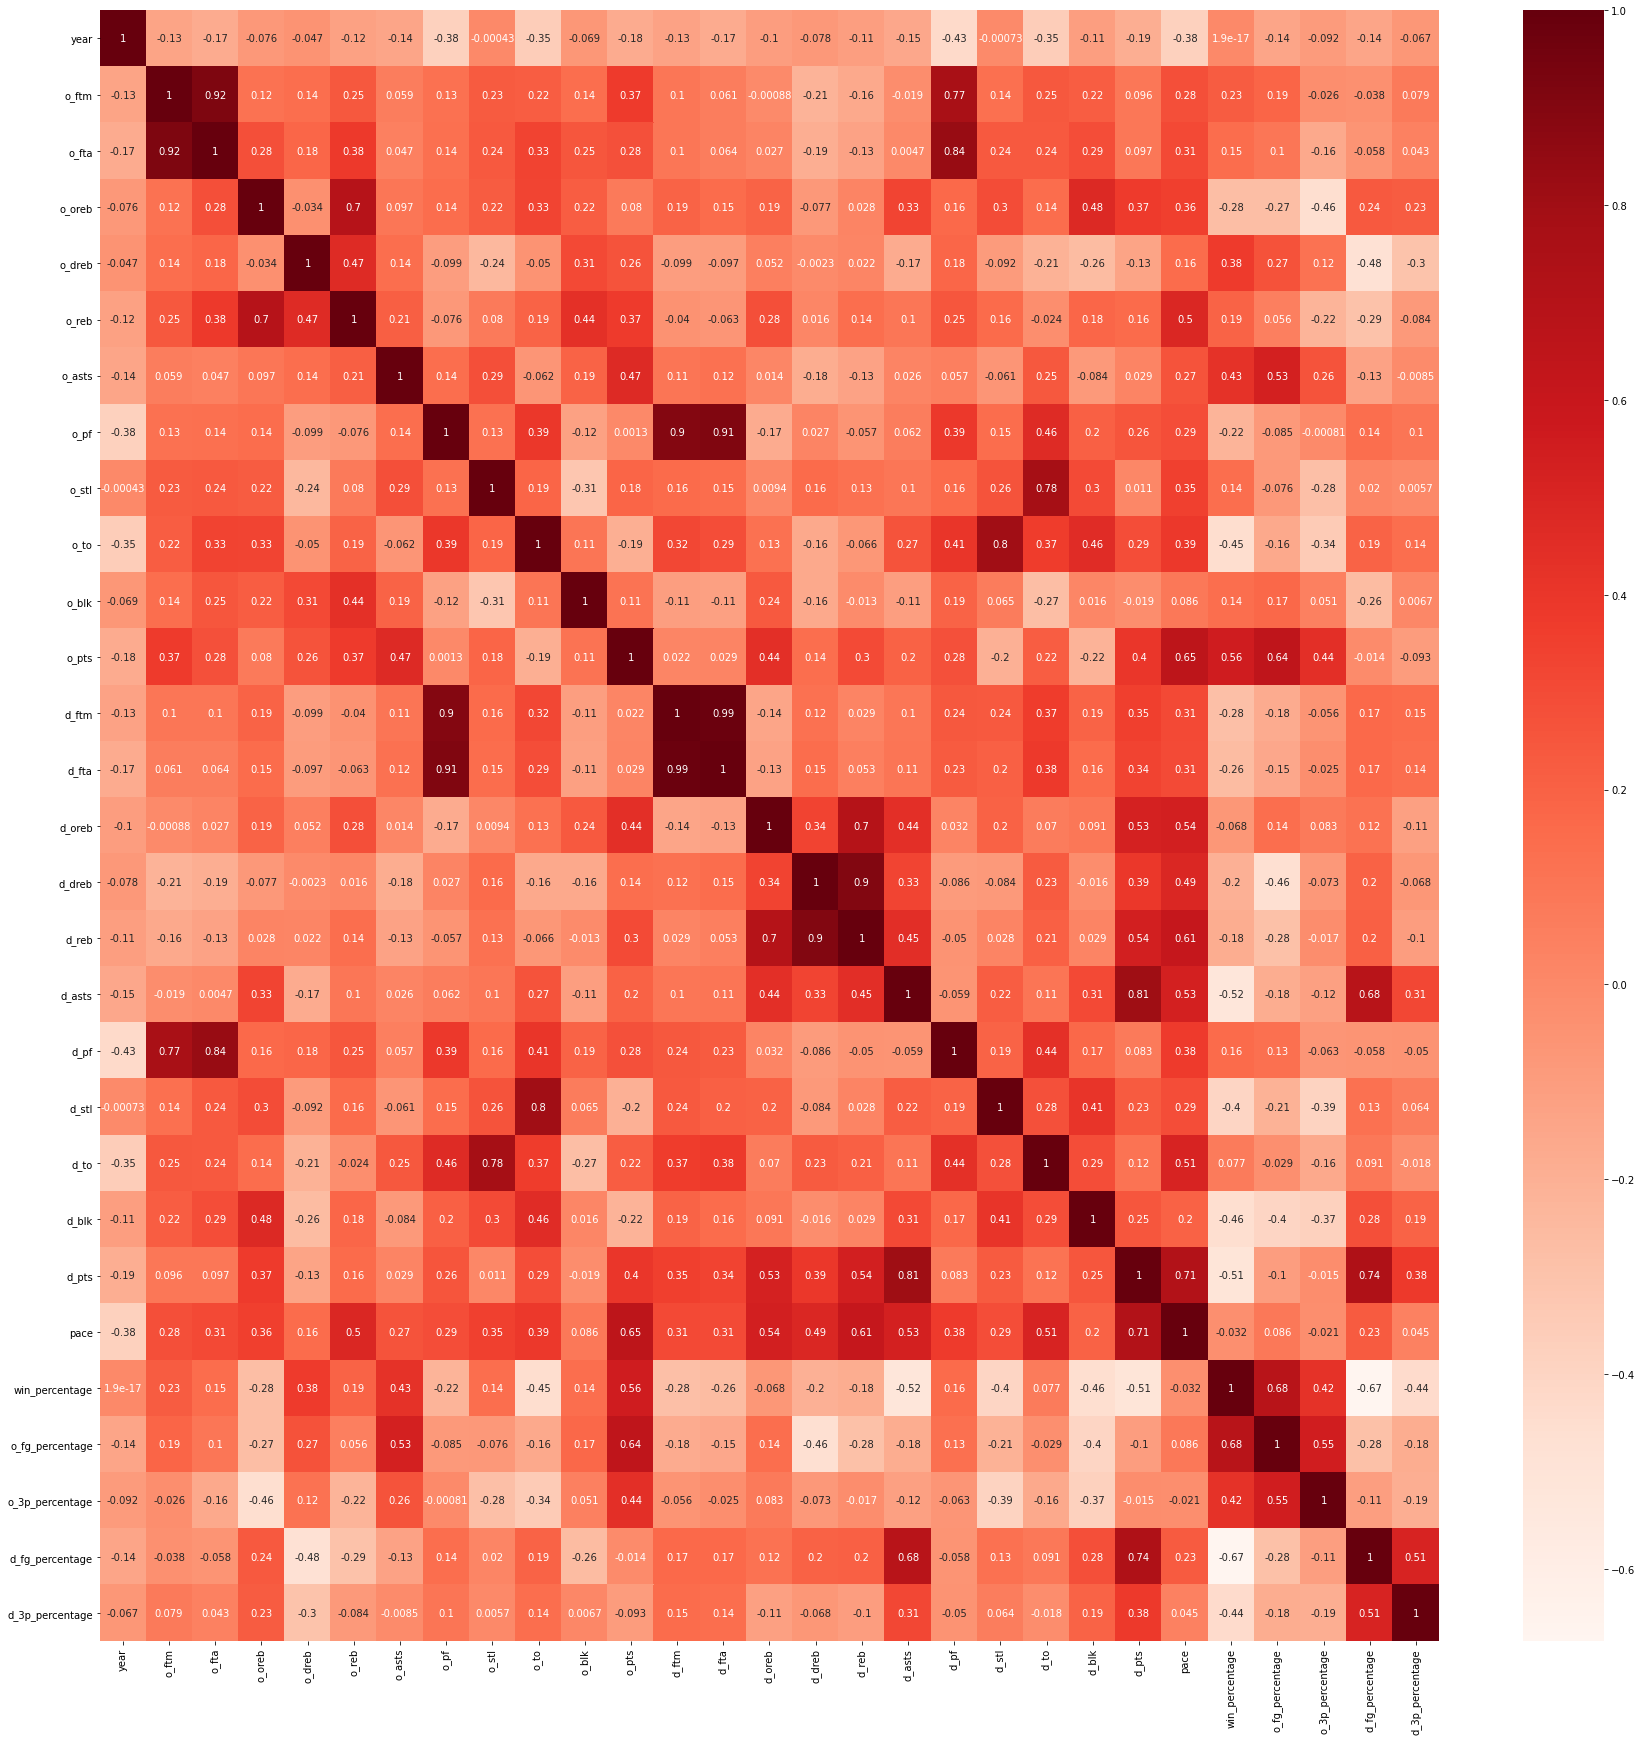

In [74]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
norm_cor = normalized_data_train.corr()
sns.heatmap(norm_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [75]:
# check the correlation with the output variable 
cor_norm_target = abs(norm_cor["win_percentage"])
#Selecting highly correlated features
relevant_norm_features = cor_norm_target[cor_norm_target>=0.5]
relevant_norm_features

o_pts              0.558632
d_asts             0.522543
d_pts              0.505037
win_percentage     1.000000
o_fg_percentage    0.684755
d_fg_percentage    0.674347
Name: win_percentage, dtype: float64

In [76]:
print(normalized_data_train[["o_pts","d_asts"]].corr())
print()

print(normalized_data_train[["o_pts","d_pts"]].corr())
print()

print(normalized_data_train[["o_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_pts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","d_pts"]].corr())
print()

print(normalized_data_train[["o_fg_percentage","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_pts","d_fg_percentage"]].corr())
print()


           o_pts    d_asts
o_pts   1.000000  0.198825
d_asts  0.198825  1.000000

          o_pts     d_pts
o_pts  1.000000  0.404757
d_pts  0.404757  1.000000

                    o_pts  o_fg_percentage
o_pts            1.000000         0.643471
o_fg_percentage  0.643471         1.000000

                   o_pts  d_fg_percentage
o_pts            1.00000         -0.01364
d_fg_percentage -0.01364          1.00000

                   d_asts  d_fg_percentage
d_asts           1.000000         0.679985
d_fg_percentage  0.679985         1.000000

                   d_asts  o_fg_percentage
d_asts           1.000000        -0.180525
o_fg_percentage -0.180525         1.000000

          d_asts     d_pts
d_asts  1.000000  0.808348
d_pts   0.808348  1.000000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.284147
d_fg_percentage        -0.284147         1.000000

                    d_pts  o_fg_percentage
d_pts            1.000000        -0.100149
o_f

In [77]:
print(normalized_data_train[["d_asts","win_percentage"]].corr())
print()
print(normalized_data_train[["d_fg_percentage","win_percentage"]].corr())
print()

                  d_asts  win_percentage
d_asts          1.000000       -0.522543
win_percentage -0.522543        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.674347
win_percentage         -0.674347        1.000000



In [78]:
print(normalized_data_train[["o_pts","d_pts"]].corr())
print()

print(normalized_data_train[["o_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_pts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_fg_percentage","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_pts","d_fg_percentage"]].corr())
print()

          o_pts     d_pts
o_pts  1.000000  0.404757
d_pts  0.404757  1.000000

                    o_pts  o_fg_percentage
o_pts            1.000000         0.643471
o_fg_percentage  0.643471         1.000000

                   o_pts  d_fg_percentage
o_pts            1.00000         -0.01364
d_fg_percentage -0.01364          1.00000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.284147
d_fg_percentage        -0.284147         1.000000

                    d_pts  o_fg_percentage
d_pts            1.000000        -0.100149
o_fg_percentage -0.100149         1.000000

                    d_pts  d_fg_percentage
d_pts            1.000000         0.737951
d_fg_percentage  0.737951         1.000000



In [79]:
print(normalized_data_train[["d_pts","win_percentage"]].corr())
print()
print(normalized_data_train[["d_fg_percentage","win_percentage"]].corr())
print()

                   d_pts  win_percentage
d_pts           1.000000       -0.505037
win_percentage -0.505037        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.674347
win_percentage         -0.674347        1.000000



In [80]:
print(normalized_data_train[["o_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_pts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_fg_percentage","d_fg_percentage"]].corr())
print()

                    o_pts  o_fg_percentage
o_pts            1.000000         0.643471
o_fg_percentage  0.643471         1.000000

                   o_pts  d_fg_percentage
o_pts            1.00000         -0.01364
d_fg_percentage -0.01364          1.00000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.284147
d_fg_percentage        -0.284147         1.000000



In [81]:
print(normalized_data_train[["o_pts","win_percentage"]].corr())
print()
print(normalized_data_train[["o_fg_percentage","win_percentage"]].corr())
print()

                   o_pts  win_percentage
o_pts           1.000000        0.558632
win_percentage  0.558632        1.000000

                 o_fg_percentage  win_percentage
o_fg_percentage         1.000000        0.684755
win_percentage          0.684755        1.000000



Take out o_pts as it has a lower correlation with win_percentage...
We are now left with o_fg_percentage and d_fg_percentage

In [82]:
print(normalized_data_train[["o_fg_percentage","win_percentage"]].corr())
print()
print(normalized_data_train[["d_fg_percentage","win_percentage"]].corr())

                 o_fg_percentage  win_percentage
o_fg_percentage         1.000000        0.684755
win_percentage          0.684755        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.674347
win_percentage         -0.674347        1.000000


In [83]:
import sklearn
from sklearn.linear_model import LinearRegression

#Training Data
train_reg_x = normalized_data_train[["d_fg_percentage","o_fg_percentage"]].copy()
train_reg_y = normalized_data_train["win_percentage"].copy()

lg_model = LinearRegression().fit(train_reg_x,train_reg_y)

# Predicting
y_evaluate = noramlized_drop_data[noramlized_drop_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = noramlized_drop_data[(noramlized_drop_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[["d_fg_percentage","o_fg_percentage"]]



# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²)

r_sq = lg_model.score(train_reg_x,train_reg_y)
print('coefficient of determination:', r_sq)

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, lg_model.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(lg_model.predict(x_test))

coefficient of determination: 0.7192916393885112
Mean Sqaured Error : 234.18457093720565

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[46.02654941 53.58965717 37.91062551 47.37670674 50.14588779 44.02782539
 62.3758471  48.2397168  66.98021323 51.75880253 32.26616589 57.67490966
 54.77627263 48.29585179 47.19688942 76.70350762 57.91263359 37.92327274
 57.39955954 29.4621519  48.02207119 48.5378438  49.0049063  54.79910459
 68.24020726 47.70244956 44.64104607 52.03836699 31.30334128]


Log Transform Normalized

In [84]:
log_data = full_data.copy() 
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    log_data[cols] = np.log(log_data[cols])
log_data.tail(10) 

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1177  ORL  2004    N  ...         3.553475         3.809686         3.535568
1178  PHI  2004    N  ...         3.548343         3.790379         3.589555
1179  PHO  2004    N  ...         3.670951         3.794641         3.510615
1180  POR  2004    N  ...         3.588388         3.799197         3.534989
1181  SAC  2004    N  ...         3.621471         3.826491         3.576158
1182  SAS  2004    N  ...         3.593031         3.752985         3.601765
1183  SEA  2004    N  ...         3.597673         3.827373         3.574791
1184  TOR  2004    N  ...         3.651917         3.843860         3.572272
1185  UTA  2004    N  ...         3.490685         3.823929         3.623570
1186  WAS  2004    N  ...         3.535507         3.827004         3.594093

[10 rows x 41 columns]

In [85]:
normalized_log_data = log_data.copy()
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    normalized_log_data[cols] = (normalized_log_data[cols] - normalized_log_data[cols].mean())/normalized_log_data[cols].std()
normalized_log_data.head()    

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157

[5 rows x 41 columns]

In [86]:
normalized_data_train = normalized_log_data[(normalized_log_data["year"] >= 1999) & (normalized_log_data["year"] < 2003)].copy()
normalized_data_train= normalized_data_train.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
normalized_data_train.head()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157

[5 rows x 31 columns]

Pearson HeatMap

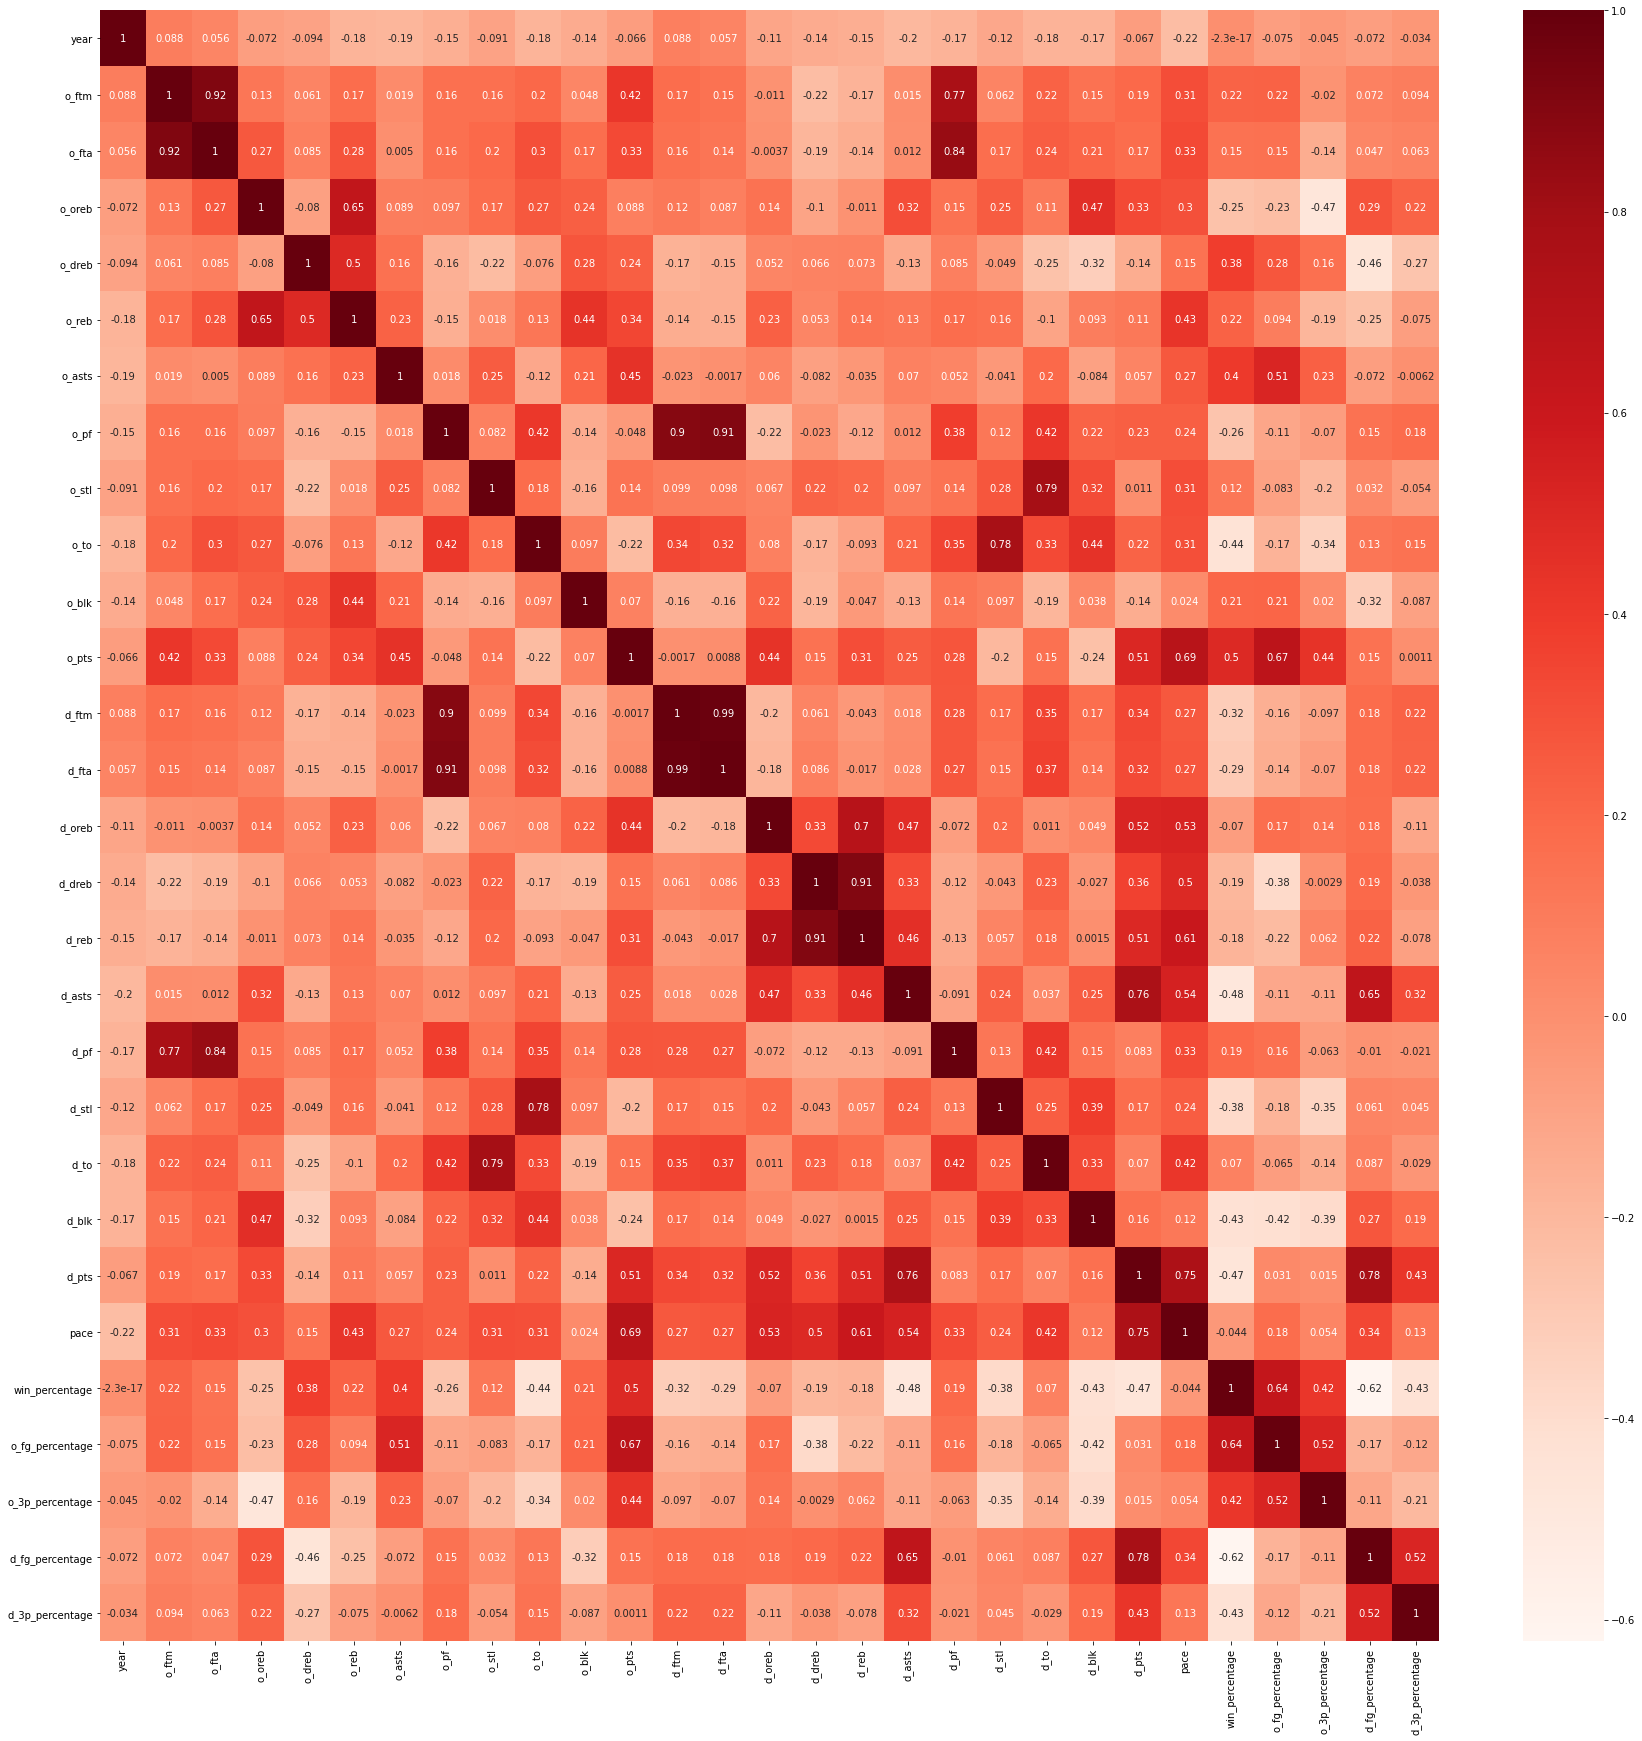

In [172]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
norm_cor = normalized_data_train.corr()
sns.heatmap(norm_cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('pearsonCorr.png')
plt.show()

In [88]:
# check the correlation with the output variable 
cor_norm_target = abs(norm_cor["win_percentage"])
#Selecting highly correlated features
relevant_norm_features = cor_norm_target[cor_norm_target>=0.5]
relevant_norm_features

o_pts              0.560289
d_asts             0.511322
d_pts              0.502363
win_percentage     1.000000
o_fg_percentage    0.684706
d_fg_percentage    0.672088
Name: win_percentage, dtype: float64

In [89]:
print(normalized_data_train[["o_pts","d_asts"]].corr())
print()

print(normalized_data_train[["o_pts","d_pts"]].corr())
print()

print(normalized_data_train[["o_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_pts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","d_pts"]].corr())
print()

print(normalized_data_train[["o_fg_percentage","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_pts","d_fg_percentage"]].corr())
print()

           o_pts    d_asts
o_pts   1.000000  0.210855
d_asts  0.210855  1.000000

          o_pts     d_pts
o_pts  1.000000  0.404997
d_pts  0.404997  1.000000

                   o_pts  o_fg_percentage
o_pts            1.00000          0.64879
o_fg_percentage  0.64879          1.00000

                    o_pts  d_fg_percentage
o_pts            1.000000        -0.011806
d_fg_percentage -0.011806         1.000000

                   d_asts  d_fg_percentage
d_asts           1.000000         0.675391
d_fg_percentage  0.675391         1.000000

                   d_asts  o_fg_percentage
d_asts           1.000000        -0.168576
o_fg_percentage -0.168576         1.000000

          d_asts     d_pts
d_asts  1.000000  0.809357
d_pts   0.809357  1.000000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.281686
d_fg_percentage        -0.281686         1.000000

                    d_pts  o_fg_percentage
d_pts            1.000000        -0.094944
o_f

In [90]:
print(normalized_data_train[["d_pts","win_percentage"]].corr())
print()
print(normalized_data_train[["d_fg_percentage","win_percentage"]].corr())

                   d_pts  win_percentage
d_pts           1.000000       -0.502363
win_percentage -0.502363        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.672088
win_percentage         -0.672088        1.000000


In [91]:
print(normalized_data_train[["o_pts","d_asts"]].corr())
print()

print(normalized_data_train[["o_pts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_pts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_fg_percentage","d_fg_percentage"]].corr())
print()

           o_pts    d_asts
o_pts   1.000000  0.210855
d_asts  0.210855  1.000000

                   o_pts  o_fg_percentage
o_pts            1.00000          0.64879
o_fg_percentage  0.64879          1.00000

                    o_pts  d_fg_percentage
o_pts            1.000000        -0.011806
d_fg_percentage -0.011806         1.000000

                   d_asts  d_fg_percentage
d_asts           1.000000         0.675391
d_fg_percentage  0.675391         1.000000

                   d_asts  o_fg_percentage
d_asts           1.000000        -0.168576
o_fg_percentage -0.168576         1.000000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.281686
d_fg_percentage        -0.281686         1.000000



In [92]:
print(normalized_data_train[["o_fg_percentage","win_percentage"]].corr())
print()
print(normalized_data_train[["o_pts","win_percentage"]].corr())

                 o_fg_percentage  win_percentage
o_fg_percentage         1.000000        0.684706
win_percentage          0.684706        1.000000

                   o_pts  win_percentage
o_pts           1.000000        0.560289
win_percentage  0.560289        1.000000


In [93]:

print(normalized_data_train[["d_asts","d_fg_percentage"]].corr())
print()

print(normalized_data_train[["d_asts","o_fg_percentage"]].corr())
print()

print(normalized_data_train[["o_fg_percentage","d_fg_percentage"]].corr())
print()

                   d_asts  d_fg_percentage
d_asts           1.000000         0.675391
d_fg_percentage  0.675391         1.000000

                   d_asts  o_fg_percentage
d_asts           1.000000        -0.168576
o_fg_percentage -0.168576         1.000000

                 o_fg_percentage  d_fg_percentage
o_fg_percentage         1.000000        -0.281686
d_fg_percentage        -0.281686         1.000000



In [94]:
print(normalized_data_train[["d_asts","win_percentage"]].corr())
print()
print(normalized_data_train[["d_fg_percentage","win_percentage"]].corr())

                  d_asts  win_percentage
d_asts          1.000000       -0.511322
win_percentage -0.511322        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.672088
win_percentage         -0.672088        1.000000


In [95]:
print(normalized_data_train[["o_fg_percentage","win_percentage"]].corr())
print()
print(normalized_data_train[["d_fg_percentage","win_percentage"]].corr())

                 o_fg_percentage  win_percentage
o_fg_percentage         1.000000        0.684706
win_percentage          0.684706        1.000000

                 d_fg_percentage  win_percentage
d_fg_percentage         1.000000       -0.672088
win_percentage         -0.672088        1.000000


In [96]:
import sklearn
from sklearn.linear_model import LinearRegression

#Training Data
train_reg_x = normalized_data_train[["d_fg_percentage","o_fg_percentage"]].copy()
train_reg_y = normalized_data_train["win_percentage"].copy()


lg_model = LinearRegression().fit(train_reg_x,train_reg_y)

# Predicting
y_evaluate = normalized_log_data[normalized_log_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = normalized_log_data[(normalized_log_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[["d_fg_percentage","o_fg_percentage"]]



# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²)

r_sq = lg_model.score(train_reg_x,train_reg_y)
print('coefficient of determination:', r_sq)

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, lg_model.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(lg_model.predict(x_test))

coefficient of determination: 0.7182626183499778
Mean Sqaured Error : 235.4780909190648

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[45.97099846 53.62542924 37.38655065 47.33024847 50.15290275 44.09427632
 62.95244201 48.24547622 67.65684214 51.80241802 32.28617511 57.63015115
 54.81276242 48.23099226 47.24080603 77.09486535 58.0849677  37.55778989
 57.53811767 29.63847687 47.96392493 48.54958177 49.02617244 54.6589296
 69.02920755 47.73428282 44.37958931 52.08733498 31.0375968 ]


# RFE ( RECURSIVE FEATURE ELIMINATION )

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()

#Training Data
train_reg_x = original_data[["o_ftm"	, "o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]].copy()
train_reg_y = original_data["win_percentage"].copy()

#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_reg_x,train_reg_y)  
#Fitting the data to model
model.fit(X_rfe,train_reg_y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
 False  True  True  True False False False False False  True  True  True
  True  True  True]
[15 14 11 18 12  9  7  6 10  2  1  5  8  1  1  1 17 13 16  4  3  1  1  1
  1  1  1]


In [98]:
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(train_reg_x,train_reg_y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.780986


In [99]:
cols = list(train_reg_x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_reg_x,train_reg_y)  
#Fitting the data to model
model.fit(X_rfe,train_reg_y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['o_pts', 'd_oreb', 'd_dreb', 'd_reb', 'd_pts', 'pace',
       'o_fg_percentage', 'o_3p_percentage', 'd_fg_percentage',
       'd_3p_percentage'],
      dtype='object')


Testing RFE

In [100]:
import sklearn
from sklearn.linear_model import LinearRegression

#Training Data
train_rfe_x = original_data[['o_pts', 'd_oreb', 'd_dreb', 'd_reb', 'd_pts', 'pace',
       'o_fg_percentage', 'o_3p_percentage', 'd_fg_percentage',
       'd_3p_percentage']].copy()
train_rfe_y = original_data["win_percentage"].copy()


rfe_model = LinearRegression().fit(train_rfe_x,train_rfe_y)


# Predicting
y_evaluate = full_data[full_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = full_data[(full_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[['o_pts', 'd_oreb', 'd_dreb', 'd_reb', 'd_pts', 'pace',
       'o_fg_percentage', 'o_3p_percentage', 'd_fg_percentage',
       'd_3p_percentage']]

# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²)

r_sq = rfe_model.score(train_rfe_x,train_rfe_y)
print('coefficient of determination:', r_sq)

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, rfe_model.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(rfe_model.predict(x_test))

coefficient of determination: 0.9570251831278168
Mean Sqaured Error : 247.1515811520217

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[35.36137257 45.34295049 29.77877876 41.87833271 65.34146976 51.22695711
 68.333104   47.95701706 56.41578875 68.30754217 33.46078666 64.4810141
 57.32821705 52.52269358 53.91214165 69.71912148 58.96834027 48.55718918
 47.04658759 26.49444987 41.65446978 38.80077239 45.32227646 65.79056678
 73.88086394 47.85994153 41.12284356 46.24044114 29.94118196]


# RFE ( RECURSIVE FEATURE ELIMINATION ) - Normalized Data

In [101]:
normalized_data_train = noramlized_drop_data.copy()
normalized_data_train = normalized_data_train[(normalized_data_train["year"] >= 1999) & (normalized_data_train["year"] < 2003)].copy()

In [102]:
normalized_data_train.head()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.555495         0.753637         0.963733
1013  BOS  1999    N  ...        -0.890967         1.785918         0.546291
1014  CHA  1999    N  ...        -0.544020         0.241643         1.591085
1015  CHI  1999    N  ...        -0.957985         0.830324        -0.673283
1016  CLE  1999    N  ...         1.047870        -0.071649        -0.609522

[5 rows x 31 columns]

In [103]:
normalized_data_train.tail()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1123  SAS  2002    N  ...         0.149398        -1.197957        -0.790193
1124  SEA  2002    N  ...         0.134081         0.200038        -0.486109
1125  TOR  2002    N  ...        -0.349634         1.166772         1.448766
1126  UTA  2002    N  ...        -0.041142        -0.740359        -0.170933
1127  WAS  2002    N  ...        -1.788131        -0.134908         0.590615

[5 rows x 31 columns]

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()

#Training Data
train_reg_x = normalized_data_train[["o_ftm"	, "o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]].copy()
train_reg_y = normalized_data_train["win_percentage"].copy()

#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_reg_x,train_reg_y)  
#Fitting the data to model
model.fit(X_rfe,train_reg_y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True  True False
 False  True  True  True False False False  True False  True  True  True
 False  True False]
[14 13 10 16 11  8  5  6  9  1  1  2  4  1  1  1 15 12 18  1  7  1  1  1
 17  1  3]


In [105]:
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(train_reg_x,train_reg_y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.454457


In [106]:
cols = list(train_reg_x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_reg_x,train_reg_y)  
#Fitting the data to model
model.fit(X_rfe,train_reg_y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['o_blk', 'o_pts', 'd_oreb', 'd_dreb', 'd_reb', 'd_to', 'd_pts', 'pace',
       'o_fg_percentage', 'd_fg_percentage'],
      dtype='object')


Testing RFE

In [107]:
normalized_data_train.tail()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1123  SAS  2002    N  ...         0.149398        -1.197957        -0.790193
1124  SEA  2002    N  ...         0.134081         0.200038        -0.486109
1125  TOR  2002    N  ...        -0.349634         1.166772         1.448766
1126  UTA  2002    N  ...        -0.041142        -0.740359        -0.170933
1127  WAS  2002    N  ...        -1.788131        -0.134908         0.590615

[5 rows x 31 columns]

In [108]:
import sklearn
from sklearn.linear_model import LinearRegression

#Training Data
train_rfe_x = normalized_data_train[['o_blk', 'o_pts', 'd_oreb', 'd_dreb', 'd_reb', 'd_to', 'd_pts', 'pace',
       'o_fg_percentage', 'd_fg_percentage']].copy()
train_rfe_y = normalized_data_train["win_percentage"].copy()


rfe_model = LinearRegression().fit(train_rfe_x,train_rfe_y)

# Predicting
y_evaluate = noramlized_drop_data[noramlized_drop_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = noramlized_drop_data[(noramlized_drop_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[['o_blk', 'o_pts', 'd_oreb', 'd_dreb', 'd_reb', 'd_to', 'd_pts', 'pace',
       'o_fg_percentage', 'd_fg_percentage']]


# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²)

r_sq = rfe_model.score(train_rfe_x,train_rfe_y)
print('coefficient of determination:', r_sq)

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, rfe_model.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(rfe_model.predict(x_test))

coefficient of determination: 0.9576834274063646
Mean Sqaured Error : 245.53634816572477

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[35.03139005 45.38311873 29.86496457 42.26966949 65.69179067 52.21869716
 68.69990192 48.04059769 56.985444   68.32759024 32.45253877 63.5616717
 58.62182002 52.14916289 53.40755886 69.49963653 58.59875232 47.86800652
 46.47952412 25.83577123 41.06240593 38.6151442  45.08366219 64.98274037
 74.60665995 47.88989491 40.72864288 46.88773934 29.73751006]


# RFE ( RECURSIVE FEATURE ELIMINATION ) - Log Transformed Normalized Data

In [176]:
log_data = full_data.copy() 
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    log_data[cols] = np.log(log_data[cols])
log_data.tail(10) 

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1177  ORL  2004    N  ...         3.553475         3.809686         3.535568
1178  PHI  2004    N  ...         3.548343         3.790379         3.589555
1179  PHO  2004    N  ...         3.670951         3.794641         3.510615
1180  POR  2004    N  ...         3.588388         3.799197         3.534989
1181  SAC  2004    N  ...         3.621471         3.826491         3.576158
1182  SAS  2004    N  ...         3.593031         3.752985         3.601765
1183  SEA  2004    N  ...         3.597673         3.827373         3.574791
1184  TOR  2004    N  ...         3.651917         3.843860         3.572272
1185  UTA  2004    N  ...         3.490685         3.823929         3.623570
1186  WAS  2004    N  ...         3.535507         3.827004         3.594093

[10 rows x 41 columns]

In [177]:
normalized_log_data = log_data.copy()
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    normalized_log_data[cols] = (normalized_log_data[cols] - normalized_log_data[cols].mean())/normalized_log_data[cols].std()
normalized_log_data.head()    

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157

[5 rows x 41 columns]

In [178]:
normalized_data_train = normalized_log_data[(normalized_log_data["year"] >= 1999) & (normalized_log_data["year"] < 2003)].copy()
normalized_data_train = normalized_data_train.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
normalized_data_train.tail()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1123  SAS  2002    N  ...         0.177853        -1.203095        -0.779062
1124  SEA  2002    N  ...         0.162809         0.214964        -0.467071
1125  TOR  2002    N  ...        -0.319601         1.159032         1.420345
1126  UTA  2002    N  ...        -0.010283        -0.731766        -0.148322
1127  WAS  2002    N  ...        -1.845620        -0.118938         0.603241

[5 rows x 31 columns]

In [179]:
normalized_data_train.tail()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1123  SAS  2002    N  ...         0.177853        -1.203095        -0.779062
1124  SEA  2002    N  ...         0.162809         0.214964        -0.467071
1125  TOR  2002    N  ...        -0.319601         1.159032         1.420345
1126  UTA  2002    N  ...        -0.010283        -0.731766        -0.148322
1127  WAS  2002    N  ...        -1.845620        -0.118938         0.603241

[5 rows x 31 columns]

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()

#Training Data
train_reg_x = normalized_data_train[["o_ftm"	, "o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]].copy()
train_reg_y = normalized_data_train["win_percentage"].copy()

#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_reg_x,train_reg_y)  
#Fitting the data to model
model.fit(X_rfe,train_reg_y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True  True False
  True False  True  True False False False  True False  True  True  True
 False  True False]
[ 9 13 16 12 17  4  5  7 11  1  1  6  1 14  1  1 18  8 15  1  3  1  1  1
 10  1  2]


In [186]:
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(train_reg_x,train_reg_y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.956273


In [192]:
cols = list(train_reg_x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(train_reg_x,train_reg_y)  
#Fitting the data to model
model.fit(X_rfe,train_reg_y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['o_pts', 'd_pts'], dtype='object')


Testing RFE

In [194]:
import sklearn
from sklearn.linear_model import LinearRegression

#Training Data
train_rfe_x = normalized_data_train[['o_pts', 'd_pts']].copy()
train_rfe_y = normalized_data_train["win_percentage"].copy()

rfe_model = LinearRegression().fit(train_rfe_x,train_rfe_y)

# Predicting
y_evaluate = normalized_log_data[normalized_log_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = normalized_log_data[(normalized_log_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[['o_pts', 'd_pts']]


# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²)

r_sq = rfe_model.score(train_rfe_x,train_rfe_y)
print('coefficient of determination:', r_sq)

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, rfe_model.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate)
print()
print("Predicted Data")
print(rfe_model.predict(x_test))

coefficient of determination: 0.9501205482973515
Mean Sqaured Error : 249.96859464643728

Actual Data
0     15.853659
1     54.878049
2     57.317073
3     51.219512
4     70.731707
5     59.756098
6     65.853659
7     41.463415
8     62.195122
9     53.658537
10    45.121951
11    41.463415
12    54.878049
13    71.951220
14    36.585366
15    53.658537
16    51.219512
17    21.951220
18    40.243902
19    43.902439
20    52.439024
21    75.609756
22    32.926829
23    60.975610
24    71.951220
25    63.414634
26    40.243902
27    31.707317
28    54.878049
Name: win_percentage_y, dtype: float64

Predicted Data
[34.71324329 45.2571641  28.71010976 41.38081693 63.1149561  53.45284465
 71.70001367 47.71123463 56.62151652 70.98472421 35.08696112 62.74168263
 58.07327905 52.25223406 53.32988747 69.09361282 59.3228131  49.95621225
 45.2283163  27.26478236 41.71184333 37.75242417 45.96136379 65.43493814
 76.42312526 47.86786509 39.75112445 46.17873772 31.38085117]


# Embedded Method

In [117]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg_lasso = LassoCV()

# Training Datag
train_reg_lasso_x = original_data[["o_ftm"	, "o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]].copy()
train_reg_lasso_y = original_data["win_percentage"].copy()

reg_lasso.fit(train_reg_lasso_x, train_reg_lasso_y)

print("Best alpha using built-in LassoCV: %f" % reg_lasso.alpha_)
print("Best score using built-in LassoCV: %f" % reg_lasso.score(train_reg_lasso_x,train_reg_lasso_y))
coef = pd.Series(reg_lasso.coef_, index = train_reg_lasso_x.columns)

Best alpha using built-in LassoCV: 85.180159
Best score using built-in LassoCV: 0.950340


In [118]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 25 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

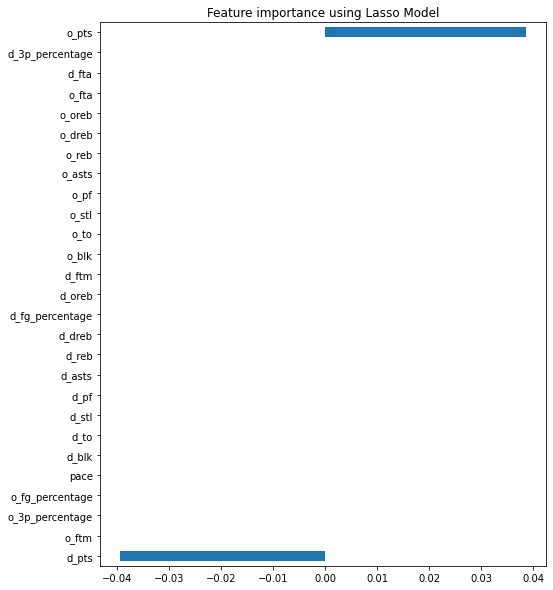

In [119]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Predicting on Lasso

In [120]:
#Training Data
train_reg_lasso_x = original_data[["o_pts","d_pts"]].copy()
train_reg_lasso_y = original_data["win_percentage"].copy()

reg_lasso.fit(train_reg_lasso_x, train_reg_lasso_y)

# Predicting
y_evaluate = full_data[full_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = full_data[(full_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[["o_pts","d_pts"]]

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, reg_lasso.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(reg_lasso.predict(x_test))

Mean Sqaured Error : 245.70667824845825

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[34.76604461 45.20950486 29.3097557  41.48175409 64.09049434 53.45815016
 69.77848847 47.73368498 56.15291583 69.40757749 34.8352876  62.78665256
 58.02870102 52.11048121 53.3618605  68.30014892 58.67170048 49.93941662
 45.35251895 26.78600926 42.26363858 37.66949773 46.12589384 66.15453478
 74.26046116 47.79534222 40.69634365 46.42861141 31.5549686 ]


# Embedded Method - Normalized Data

In [121]:
normalized_data_train = noramlized_drop_data.copy()
normalized_data_train = normalized_data_train[(normalized_data_train["year"] >= 1999) & (normalized_data_train["year"] < 2003)].copy()
normalized_data_train.head()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.555495         0.753637         0.963733
1013  BOS  1999    N  ...        -0.890967         1.785918         0.546291
1014  CHA  1999    N  ...        -0.544020         0.241643         1.591085
1015  CHI  1999    N  ...        -0.957985         0.830324        -0.673283
1016  CLE  1999    N  ...         1.047870        -0.071649        -0.609522

[5 rows x 31 columns]

In [122]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg_lasso = LassoCV()

# Training Datag
train_reg_lasso_x = normalized_data_train[["o_ftm"	, "o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]].copy()
train_reg_lasso_y = normalized_data_train["win_percentage"].copy()

reg_lasso.fit(train_reg_lasso_x, train_reg_lasso_y)

print("Best alpha using built-in LassoCV: %f" % reg_lasso.alpha_)
print("Best score using built-in LassoCV: %f" % reg_lasso.score(train_reg_lasso_x,train_reg_lasso_y))
coef = pd.Series(reg_lasso.coef_, index = train_reg_lasso_x.columns)

Best alpha using built-in LassoCV: 0.216581
Best score using built-in LassoCV: 0.955697


In [123]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 16 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

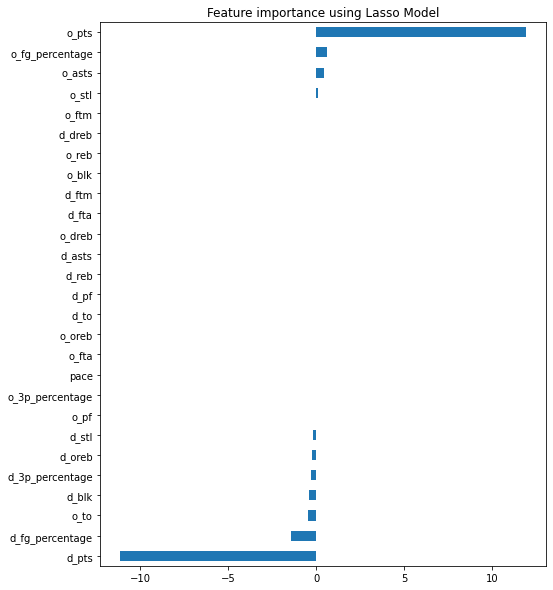

In [124]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Predicting on Lasso

In [125]:
#Training Data

train_reg_lasso_x = normalized_data_train[[ "o_pts","o_fg_percentage", "o_asts","o_stl","d_stl","d_oreb", "d_3p_percentage","d_blk","o_to","d_fg_percentage","d_pts"]].copy()
train_reg_lasso_y = normalized_data_train["win_percentage"].copy()

reg_lasso.fit(train_reg_lasso_x, train_reg_lasso_y)

# Predicting
y_evaluate = noramlized_drop_data[full_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = full_data[(noramlized_drop_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[[ "o_pts","o_fg_percentage", "o_asts","o_stl","d_stl","d_oreb", "d_3p_percentage","d_blk","o_to","d_fg_percentage","d_pts"]]

print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, reg_lasso.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(reg_lasso.predict(x_test))

Mean Sqaured Error : 52792300.36285092

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[ 1799.96352926  4954.51434389    91.39492022  3829.27424676
 11412.15010791  7490.58045915 11413.25025355  5543.66530188
  7505.66959064 11504.69981413  1988.35467935 10420.53261401
  8780.91063324  6521.57493475  7673.8581957  11619.50963603
  8542.96637866  6074.29734105  4759.84818556  -257.07915688
  3491.51168265  2768.67907641  4924.87734316 11747.34893396
 12824.87100734  5970.62724818  2912.86373583  4706.88474685
   709.99069654]


# Embedded Method - Log Transformed Normalized Data



In [126]:
log_data = full_data.copy() 
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    log_data[cols] = np.log(log_data[cols])
log_data.tail(10) 

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1177  ORL  2004    N  ...         3.553475         3.809686         3.535568
1178  PHI  2004    N  ...         3.548343         3.790379         3.589555
1179  PHO  2004    N  ...         3.670951         3.794641         3.510615
1180  POR  2004    N  ...         3.588388         3.799197         3.534989
1181  SAC  2004    N  ...         3.621471         3.826491         3.576158
1182  SAS  2004    N  ...         3.593031         3.752985         3.601765
1183  SEA  2004    N  ...         3.597673         3.827373         3.574791
1184  TOR  2004    N  ...         3.651917         3.843860         3.572272
1185  UTA  2004    N  ...         3.490685         3.823929         3.623570
1186  WAS  2004    N  ...         3.535507         3.827004         3.594093

[10 rows x 41 columns]

In [127]:
normalized_log_data = log_data.copy()
for cols in log_data:
  if((cols != "team") & (cols != "year") & (cols != "leag") & (cols != "win_percentage")):
    normalized_log_data[cols] = (normalized_log_data[cols] - normalized_log_data[cols].mean())/normalized_log_data[cols].std()
normalized_log_data.head()    

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157

[5 rows x 41 columns]

In [128]:
normalized_data_train = normalized_log_data[(normalized_log_data["year"] >= 1999) & (normalized_log_data["year"] < 2003)].copy()
normalized_data_train=normalized_log_data.drop(["won","lost","o_fgm","o_fga","o_3pa","d_fgm","d_fga","o_3pm","d_3pa","d_3pm"],axis=1)
normalized_data_train.head()

team  year leag  ...  o_3p_percentage  d_fg_percentage  d_3p_percentage
1012  ATL  1999    N  ...        -1.588859         0.759089         0.962263
1013  BOS  1999    N  ...        -0.877107         1.748929         0.560198
1014  CHA  1999    N  ...        -0.517590         0.256190         1.552958
1015  CHI  1999    N  ...        -0.947484         0.833718        -0.658585
1016  CLE  1999    N  ...         1.036634        -0.055601        -0.593157

[5 rows x 31 columns]

In [129]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg_lasso = LassoCV()

# Training Datag
train_reg_lasso_x = normalized_data_train[["o_ftm", "o_fta", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl"	, "o_to", "o_blk", "o_pts", "d_ftm", "d_fta","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","pace","o_fg_percentage","o_3p_percentage","d_fg_percentage","d_3p_percentage"]].copy()
train_reg_lasso_y = normalized_data_train["win_percentage"].copy()

reg_lasso.fit(train_reg_lasso_x, train_reg_lasso_y)

print("Best alpha using built-in LassoCV: %f" % reg_lasso.alpha_)
print("Best score using built-in LassoCV: %f" % reg_lasso.score(train_reg_lasso_x,train_reg_lasso_y))
coef = pd.Series(reg_lasso.coef_, index = train_reg_lasso_x.columns)

Best alpha using built-in LassoCV: 0.140972
Best score using built-in LassoCV: 0.951816


In [130]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 14 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

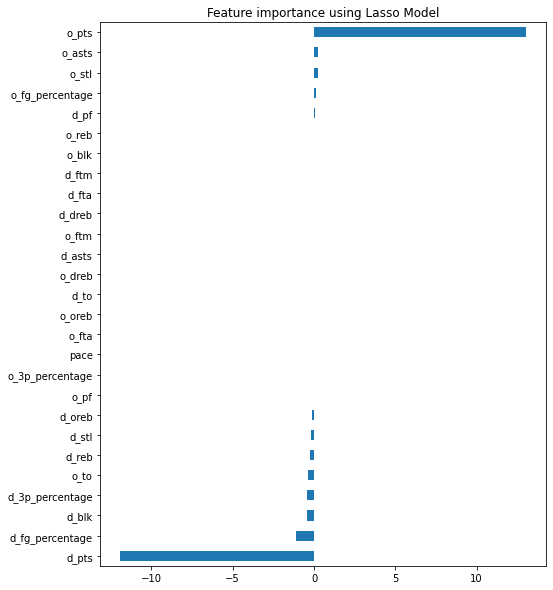

In [131]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Predicting on Lasso

In [132]:
#Training Data

train_reg_lasso_x = normalized_data_train[[ "o_pts","o_stl","d_asts","d_blk","d_ftm","o_oreb","o_blk","d_reb","d_3p_percentage","o_reb","d_dreb","o_to","d_stl","d_fg_percentage","d_pts"]].copy()
train_reg_lasso_y = normalized_data_train["win_percentage"].copy()


reg_lasso.fit(train_reg_lasso_x, train_reg_lasso_y)

# Predicting
y_evaluate = normalized_log_data[normalized_log_data["year"] == 2004].copy()
y_evaluate_teams = y_evaluate[["team","win_percentage"]]

x_test = normalized_log_data[(normalized_log_data["year"] == 2003)].copy()
x_test = pd.merge(left=x_test, right=y_evaluate_teams, left_on='team', right_on='team')

y_evaluate = x_test["win_percentage_y"]
x_test = x_test[[ "o_pts","o_stl","d_asts","d_blk","d_ftm","o_oreb","o_blk","d_reb","d_3p_percentage","o_reb","d_dreb","o_to","d_stl","d_fg_percentage","d_pts"]]


print("Mean Sqaured Error :",sklearn.metrics.mean_squared_error(y_evaluate, reg_lasso.predict(x_test)))
print()
print("Actual Data")
print(y_evaluate.values)
print()
print("Predicted Data")
print(reg_lasso.predict(x_test))

Mean Sqaured Error : 244.37372691350728

Actual Data
[15.85365854 54.87804878 57.31707317 51.2195122  70.73170732 59.75609756
 65.85365854 41.46341463 62.19512195 53.65853659 45.12195122 41.46341463
 54.87804878 71.95121951 36.58536585 53.65853659 51.2195122  21.95121951
 40.24390244 43.90243902 52.43902439 75.6097561  32.92682927 60.97560976
 71.95121951 63.41463415 40.24390244 31.70731707 54.87804878]

Predicted Data
[35.43639434 45.85085037 29.40856315 41.56475725 63.67368613 52.24068705
 71.06788758 46.22556655 55.90730131 68.75632643 34.86246359 63.92782197
 57.96408624 52.11853289 53.09286852 70.86695369 58.62030006 49.6221236
 46.30608636 27.26590397 41.64844903 38.98997295 45.51012118 65.09456516
 75.35324069 48.83995251 41.12065533 45.56576565 31.18874161]


# Obtaining Individual Game Information 


In [135]:
games = pd.read_csv('games.csv')
teams_data = pd.read_csv('teams.csv')

In [136]:
games = games[(games["SEASON"] == 2004)].copy()
games = games.drop(["HOME_TEAM_ID",	"VISITOR_TEAM_ID", "GAME_STATUS_TEXT"],axis=1)

In [137]:
teams_data = teams_data[["TEAM_ID","ABBREVIATION"]]

In [138]:
games = pd.merge(left = games, right = teams_data, left_on = 'TEAM_ID_home', right_on = 'TEAM_ID')
games.rename(columns = {'ABBREVIATION':'TEAM_HOME_ABBR'}, inplace = True)
games = pd.merge(left = games, right = teams_data, left_on = 'TEAM_ID_away', right_on = 'TEAM_ID')
games.rename(columns = {'ABBREVIATION':'TEAM_AWAY_ABBR'}, inplace = True)
games = games.drop(["TEAM_ID_x","TEAM_ID_y"], axis = 1)
games = games[["TEAM_HOME_ABBR" , "TEAM_AWAY_ABBR", "HOME_TEAM_WINS"]]
games

TEAM_HOME_ABBR TEAM_AWAY_ABBR  HOME_TEAM_WINS
0               SAS            DET               1
1               SAS            DET               0
2               SAS            DET               1
3               SAS            DET               1
4               SAS            DET               1
...             ...            ...             ...
1357            UTA            SAS               1
1358            LAL            SAS               0
1359            LAL            SAS               0
1360            LAC            SAS               0
1361            LAC            SAS               0

[1362 rows x 3 columns]

# Testing Game Prediction 

Going to assume : 


*   Home - d
*   Away - o

In [216]:
team_names = merged_inner = pd.merge(left=normalized_log_data, right=teams, left_on='team', right_on='team')

team_dets_previous = team_names[(team_names["year"] == 2003)].drop_duplicates(subset=['team'])
team_dets_outcomes = team_names[(team_names["year"] == 2004)].drop_duplicates(subset=['team'])
team_dets_outcomes = team_dets_outcomes[["team","win_percentage"]]

team_to_predict = pd.merge(left=team_dets_previous, right=team_dets_outcomes, left_on='team', right_on='team')

team_to_predict.head(5)

team  year leag_x     o_fgm  ...   location       name  leag_y  win_percentage_y
0  ATL  2003      N -0.802911  ...    Atlanta      Hawks       N         15.853659
1  BOS  2003      N -0.699951  ...     Boston    Celtics       N         54.878049
2  CHI  2003      N -1.032721  ...    Chicago      Bulls       N         57.317073
3  CLE  2003      N -0.128295  ...  Cleveland  Cavaliers       N         51.219512
4  DAL  2003      N  2.547617  ...     Dallas  Mavericks       N         70.731707

[5 rows x 45 columns]

List of teams for a year

In [217]:
print("Pick by team abbreviation")
print()
print(team_to_predict[["team","location","name"]])

Pick by team abbreviation

   team      location          name
0   ATL       Atlanta         Hawks
1   BOS        Boston       Celtics
2   CHI       Chicago         Bulls
3   CLE     Cleveland     Cavaliers
4   DAL        Dallas     Mavericks
5   DEN        Denver       Rockets
6   DET       Detroit       Pistons
7   GSW  Golden State      Warriors
8   HOU       Houston       Rockets
9   IND       Indiana        Pacers
10  LAC   Los Angeles      Clippers
11  LAL   Los Angeles        Lakers
12  MIA         Miami          Heat
13  MIL     Milwaukee         Bucks
14  MIN     Minnesota  Timberwolves
15  NJN    New Jersey          Nets
16  NYK      New York        Knicks
17  ORL       Orlando         Magic
18  PHI  Philadelphia         76ers
19  PHO       Phoenix          Suns
20  POR      Portland  Trailblazers
21  SAC    Sacramento         Kings
22  SAS   San Antonio         Spurs
23  SEA       Seattle   Supersonics
24  TOR       Toronto       Raptors
25  UTA          Utah          Jazz
2

In [218]:
# Take team 1 to be home and team 2 to be away 
team_1_name = "DAL"
team_2_name = "DEN"

team_1 = team_to_predict[(team_to_predict["team"] == team_1_name)]
team_2 = team_to_predict[(team_to_predict["team"] == team_2_name)]

In [219]:
team_1

team  year leag_x     o_fgm  ...  location       name  leag_y  win_percentage_y
4  DAL  2003      N  2.547617  ...    Dallas  Mavericks       N         70.731707

[1 rows x 45 columns]

In [220]:
team_2

team  year leag_x     o_fgm  ...  location     name  leag_y  win_percentage_y
5  DEN  2003      N  0.372436  ...    Denver  Rockets       A         59.756098

[1 rows x 45 columns]

In [221]:
# Team 1 and Team 2 actual wins 
# train = normalized_data[(normalized_data["year"] >= 1999) & (normalized_data["year"] < 2003)]
team1_vs_team2 = games[(games["TEAM_HOME_ABBR"] == team_1_name) & (games["TEAM_AWAY_ABBR"] == team_2_name)]
team1_vs_team2

TEAM_HOME_ABBR TEAM_AWAY_ABBR  HOME_TEAM_WINS
55            DAL            DEN               1

OLS Model

In [222]:
team_1_win_percentage = best_log_model.predict(team_1)
for index, val in team_1_win_percentage.iteritems():
  team_1_win_percentage = val

team_2_win_percentage = best_log_model.predict(team_2)
for index, val in team_2_win_percentage.iteritems():
  team_2_win_percentage = val

print(team_1["team"].values[0],":", team_1_win_percentage)
print(team_2["team"].values[0],":", team_2_win_percentage)
print()
print("The actual 2004 win percentage for",team_1["team"].values[0],":", team_1["win_percentage_y"].values[0])
print("The actual 2004 win percentage for",team_2["team"].values[0],":", team_2["win_percentage_y"].values[0])
print()

if(team_1_win_percentage > team_2_win_percentage):
  print(team_1["location"].values[0] , team_1["name"].values[0], "have a higher chance of winning")
elif(team_2_win_percentage > team_1_win_percentage):
  print(team_2["location"].values[0], team_2["name"].values[0] ,"have a higher chance of winning")
else:
  print("Both teams have the same win percentage. The game will most likely end in a draw")   

DAL : 63.11495610098396
DEN : 53.452844652853145

The actual 2004 win percentage for DAL : 70.73170731707317
The actual 2004 win percentage for DEN : 59.756097560975604

Dallas Mavericks have a higher chance of winning


In [223]:
# (o_pts) (d_pts) (pace) (d_fg_percentage)
# Trying with the model equation

team_1_win_percentage = best_log_model.predict(team_1[["o_pts","d_pts"]])
for index, val in team_1_win_percentage.iteritems():
  team_1_win_percentage = val

team_2_win_percentage = best_log_model.predict(team_2[["o_pts","d_pts"]])
for index, val in team_2_win_percentage.iteritems():
  team_2_win_percentage = val

print(team_1["team"].values[0],":", team_1_win_percentage)
print(team_2["team"].values[0],":", team_2_win_percentage)
print()
print("The actual 2004 win percentage for",team_1["team"].values[0],":", team_1["win_percentage_y"].values[0])
print("The actual 2004 win percentage for",team_2["team"].values[0],":", team_2["win_percentage_y"].values[0])
print()

if(team_1_win_percentage > team_2_win_percentage):
  print(team_1["location"].values[0] , team_1["name"].values[0], "have a higher chance of winning")
elif(team_2_win_percentage > team_1_win_percentage):
  print(team_2["location"].values[0], team_2["name"].values[0] ,"have a higher chance of winning")
else:
  print("Both teams have the same win percentage. The game will most likely end in a draw")  

DAL : 63.11495610098396
DEN : 53.452844652853145

The actual 2004 win percentage for DAL : 70.73170731707317
The actual 2004 win percentage for DEN : 59.756097560975604

Dallas Mavericks have a higher chance of winning


Pearson Correlation

In [224]:
team_1_win_percentage = lg_model.predict(team_1[["d_fg_percentage","o_fg_percentage"]])
team_2_win_percentage = lg_model.predict(team_2[["d_fg_percentage","o_fg_percentage"]])

print(team_1["team"].values[0],":", team_1_win_percentage[0])
print(team_2["team"].values[0],":", team_2_win_percentage[0])
print()
print("The actual 2004 win percentage for",team_1["team"].values[0],":", team_1["win_percentage_y"].values[0])
print("The actual 2004 win percentage for",team_2["team"].values[0],":", team_2["win_percentage_y"].values[0])
print()

if(team_1_win_percentage > team_2_win_percentage):
  print(team_1["location"].values[0] , team_1["name"].values[0], "have a higher chance of winning")
elif(team_2_win_percentage > team_1_win_percentage):
  print(team_2["location"].values[0], team_2["name"].values[0] ,"have a higher chance of winning")
else:
  print("Both teams have the same win percentage. The game will most likely end in a draw")  

DAL : 50.15290275299297
DEN : 44.09427631661056

The actual 2004 win percentage for DAL : 70.73170731707317
The actual 2004 win percentage for DEN : 59.756097560975604

Dallas Mavericks have a higher chance of winning


Reccursive Feature Elimination

In [225]:
team_1_win_percentage = rfe_model.predict(team_1[['o_pts', 'd_pts']])
team_2_win_percentage = rfe_model.predict(team_2[['o_pts', 'd_pts']])

print(team_1["team"].values[0],":", team_1_win_percentage[0])
print(team_2["team"].values[0],":", team_2_win_percentage[0])
print()
print("The actual 2004 win percentage for",team_1["team"].values[0],":", team_1["win_percentage_y"].values[0])
print("The actual 2004 win percentage for",team_2["team"].values[0],":", team_2["win_percentage_y"].values[0])
print()

if(team_1_win_percentage > team_2_win_percentage):
  print(team_1["location"].values[0] , team_1["name"].values[0], "have a higher chance of winning")
elif(team_2_win_percentage > team_1_win_percentage):
  print(team_2["location"].values[0], team_2["name"].values[0] ,"have a higher chance of winning")
else:
  print("Both teams have the same win percentage. The game will most likely end in a draw")  

DAL : 63.11495610098398
DEN : 53.452844652853166

The actual 2004 win percentage for DAL : 70.73170731707317
The actual 2004 win percentage for DEN : 59.756097560975604

Dallas Mavericks have a higher chance of winning


Embedded Method

In [226]:
team_1_win_percentage = reg_lasso.predict(team_1[["o_pts","o_stl","o_asts","d_blk","d_ftm","o_oreb","o_blk","d_reb","d_3p_percentage","o_reb","d_dreb","o_to","d_stl","d_fg_percentage","d_pts"]])
team_2_win_percentage = reg_lasso.predict(team_2[["o_pts","o_stl","o_asts","d_blk","d_ftm","o_oreb","o_blk","d_reb","d_3p_percentage","o_reb","d_dreb","o_to","d_stl","d_fg_percentage","d_pts"]])

print(team_1["team"].values[0],":", team_1_win_percentage[0])
print(team_2["team"].values[0],":", team_2_win_percentage[0])
print()
print("The actual 2004 win percentage for",team_1["team"].values[0],":", team_1["win_percentage_y"].values[0])
print("The actual 2004 win percentage for",team_2["team"].values[0],":", team_2["win_percentage_y"].values[0])
print()

if(team_1_win_percentage > team_2_win_percentage):
  print(team_1["location"].values[0] , team_1["name"].values[0], "have a higher chance of winning")
elif(team_2_win_percentage > team_1_win_percentage):
  print(team_2["location"].values[0], team_2["name"].values[0] ,"have a higher chance of winning")
else:
  print("Both teams have the same win percentage. The game will most likely end in a draw")  

DAL : 63.673686126335326
DEN : 52.24068705086691

The actual 2004 win percentage for DAL : 70.73170731707317
The actual 2004 win percentage for DEN : 59.756097560975604

Dallas Mavericks have a higher chance of winning


In [227]:
commons = pd.merge(left=games, right=team_to_predict, left_on='TEAM_HOME_ABBR', right_on='team')
commons = pd.merge(left=commons, right=team_to_predict, left_on='TEAM_AWAY_ABBR', right_on='team')
games = commons[["TEAM_HOME_ABBR" , "TEAM_AWAY_ABBR", "HOME_TEAM_WINS"]]
games

TEAM_HOME_ABBR TEAM_AWAY_ABBR  HOME_TEAM_WINS
0              SAS            DET               1
1              SAS            DET               0
2              SAS            DET               1
3              SAS            DET               1
4              SAS            DET               1
..             ...            ...             ...
928            LAC            SAS               0
929            DET            SAS               0
930            DET            SAS               1
931            DET            SAS               1
932            DET            SAS               1

[933 rows x 3 columns]

In [228]:
def model_outcomes(model,model_params):

  outcomes = [] 

  for index in games.index:

    team_1_name = games["TEAM_HOME_ABBR"][index]
    team_2_name = games["TEAM_AWAY_ABBR"][index]

    team_1 = team_to_predict[(team_to_predict["team"] == team_1_name)]
    team_2 = team_to_predict[(team_to_predict["team"] == team_2_name)]
    
    team_1_win_percentage = model.predict(team_1[model_params])
    team_2_win_percentage = model.predict(team_2[model_params])
    
    if(team_1_win_percentage > team_2_win_percentage):
      outcomes.append(1)
    elif(team_2_win_percentage > team_1_win_percentage):
      outcomes.append(0)      
  
  return np.array(outcomes)

In [229]:
def ols_outcomes(model,model_params):

  outcomes = [] 

  for index in games.index:

    team_1_name = games["TEAM_HOME_ABBR"][index]
    team_2_name = games["TEAM_AWAY_ABBR"][index]

    team_1 = team_to_predict[(team_to_predict["team"] == team_1_name)]
    team_2 = team_to_predict[(team_to_predict["team"] == team_2_name)]
    
    team_1_win_percentage = model.predict(team_1[model_params])
    team_2_win_percentage = model.predict(team_2[model_params])
    
    for ind, val in team_1_win_percentage.iteritems():
      team_1_win_percentage = val


    for ind, val in team_2_win_percentage.iteritems():
      team_2_win_percentage = val
    
    if(team_1_win_percentage > team_2_win_percentage):
      outcomes.append(1)
    elif(team_2_win_percentage > team_1_win_percentage):
      outcomes.append(0)      
  
  return np.array(outcomes)

In [230]:
import itertools

def drawConfusionMatrix(truth, predict_class):

  cm =  metrics.confusion_matrix(truth,predict_class)
 
  classes= [1,0]
  plt.figure(figsize=(3,3))
  title='Confusion Matrix'
  normalize=True
  cmap=plt.cm.Blues

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion Matrix')
  # print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="black" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()

In [231]:
import sklearn.metrics as metrics

def generate_scores(model, actual, pred):
    
    print("Accuracy score: %.3f" % metrics.accuracy_score(actual, pred))
    print("Recall: %.3f" % metrics.recall_score(actual, pred))
    print("Precision: %.3f" % metrics.precision_score(actual, pred))
    print("F1: %.3f" % metrics.f1_score(actual, pred))

    drawConfusionMatrix(actual, pred)

In [232]:
# Computing Outcomes
ols_table_outcomes = ols_outcomes(best_log_model,["o_pts","d_pts"])
reg_lasso_model_outcomes = model_outcomes(reg_lasso,["o_pts","o_stl","o_asts","d_blk","d_ftm","o_oreb","o_blk","d_reb","d_3p_percentage","o_reb","d_dreb","o_to","d_stl","d_fg_percentage","d_pts"])
pearson_correlation_outcomes = model_outcomes(lg_model,["d_fg_percentage","o_fg_percentage"])
rfe_model_outcomes = model_outcomes(rfe_model,['o_pts', 'd_pts'])
actual_outcomes = np.array(games["HOME_TEAM_WINS"])
print("Outcomes Computed")

Outcomes Computed


OLS Scores
Accuracy score: 0.592
Recall: 0.575
Precision: 0.716
F1: 0.638
Normalized confusion matrix


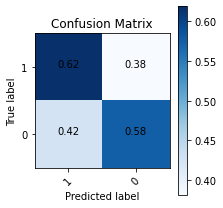


Lasso Scores
Accuracy score: 0.587
Recall: 0.574
Precision: 0.711
F1: 0.635
Normalized confusion matrix


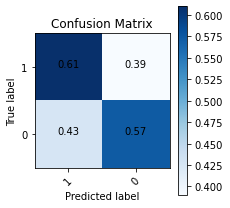


Pearson Correlation Scores
Accuracy score: 0.549
Recall: 0.541
Precision: 0.674
F1: 0.600
Normalized confusion matrix


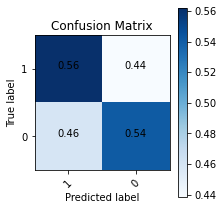


RFE Scores
Accuracy score: 0.592
Recall: 0.575
Precision: 0.716
F1: 0.638
Normalized confusion matrix


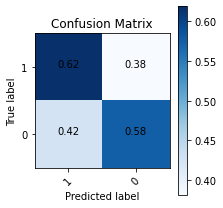

In [233]:
# Generating scores
print("OLS Scores")
generate_scores(best_log_model,actual_outcomes,ols_table_outcomes)
print()
print("Lasso Scores")
generate_scores(reg_lasso,actual_outcomes,reg_lasso_model_outcomes)
print()
print("Pearson Correlation Scores")
generate_scores(lg_model,actual_outcomes,pearson_correlation_outcomes)
print()
print("RFE Scores")
generate_scores(rfe_model,actual_outcomes,rfe_model_outcomes)

In [ ]:
df = pd.read_csv("2012-18_officialBoxScore.csv")

In [ ]:
df.shape

In [ ]:
pd.set_option('display.max_columns', 130)
# we want to see all 119 columns in the output
df.head(6)

In [ ]:
df.tail(6)

Dataset Cleaning

In [ ]:
df = df[["gmDate","gmTime", "seasTyp", "teamAbbr", "teamRslt", "teamPTS", "teamFGA", "teamFGM", "teamFG%", 
        "team2PA", "team2PM", "team2P%", "team3PA", "team3PM", "team3P%", "teamFTA", "teamFTM", "teamFT%", "teamPPS", 
        "opptAbbr", "opptRslt", "opptPTS", "opptFGA", "opptFGM", "opptFG%", "oppt2PA", "oppt2PM",
        "oppt2P%", "oppt3PA", "oppt3PM", "oppt3P%", "opptFTA", "opptFTM", "opptFT%", "opptPPS","pace"]]

Deleting redundant information caused by referees

In [ ]:
# transfer the column gmDate to a datetime data type
df["gmDate"] = pd.to_datetime(df["gmDate"])

#df.dtypes
df = df.sort_values("gmDate")

# season 2017/2018
df = df[df["gmDate"]>"2017-10-17"]

df.head()

# set the index new
df = df.reset_index(drop=True)

In [ ]:
# check whether only season games are included
df.seasTyp.unique()

In [ ]:
# we don't use the referees in our dataframe and already disregard the corresponding columns
df = df.drop_duplicates()
df.shape

All redundant refree information removed

In [ ]:
# store all double lines in a list and then delete them all.

line_counter = 0
drop_list = []

for line_counter in range(0, len(df.index)):
    for delete_line_counter in range(line_counter+1, len(df.index)):
        # compare same date and teamAbbr must be the same as opptAbbr
        if df.iloc[line_counter, 0] == df.iloc[delete_line_counter, 0] and df.iloc[line_counter, 3] == df.iloc[delete_line_counter, 19]:
            drop_list.append(delete_line_counter)
            break

In [ ]:
# desired dataframe with one line per NBA game during the regular season

df = df.drop(df.index[drop_list])
df.shape
df.head(10)

In [ ]:
# sort values with the help of game date
df = df.sort_values("gmDate")

# set the index new
df = df.reset_index(drop=True)

df.head()

In [ ]:
# which teams we have in the NBA 2018/2019 season?
teams_new = df.teamAbbr.unique()
print(teams_new)

Going to assume : 


*   Home - d
*   Away - o

In [ ]:
# Taking the log of the data 

log_new_data = df.copy() 
for cols in log_new_data:
  if((cols != "gmDate") & (cols != "gmTime") & (cols != "seasTyp") & (cols != "teamAbbr") & (cols != "teamRslt") & (cols != "opptAbbr") & (cols != "opptRslt")):
    log_new_data[cols] = np.log(log_new_data[cols])
log_new_data.head() 

In [ ]:
# Normalizing new log data 

normalized_new_log_data = log_new_data.copy()
for cols in normalized_new_log_data:
  if((cols != "gmDate") & (cols != "gmTime") & (cols != "seasTyp") & (cols != "teamAbbr") & (cols != "teamRslt") & (cols != "opptAbbr") & (cols != "opptRslt")):
    normalized_new_log_data[cols] = (normalized_new_log_data[cols] - normalized_new_log_data[cols].mean())/normalized_new_log_data[cols].std()
normalized_new_log_data.head()   

In [ ]:
# normalized_new_log_data[[(normalized_new_log_data["teamAbbr"] == team_1_name) & (normalized_new_log_data["opptAbbr"] == team_1_name)]]
normalized_new_log_data[(normalized_new_log_data["teamAbbr"] == "WAS") & (normalized_new_log_data["opptAbbr"] == "PHI")].copy()

In [ ]:
normalized_new_log_data[(normalized_new_log_data["teamAbbr"] == team_2_name)].head()

Predicting on OLS table 

Features :
 (o_pts) (d_pts) (pace) (d_fg_percentage)

Remember :
*   o - opponent 
*   d - team

In [ ]:
team_1_name = "BOS"
team_2_name = "WAS"

# team_1_dets = normalized_new_log_data[(normalized_new_log_data["teamAbbr"] == team_1_name)].copy()
# team_1_dets = team_1_dets["opptPTS","teamPTS","pace","teamFG%"]
# team_2_dets =  normalized_new_log_data[(normalized_new_log_data["teamAbbr"] == team_2_name)].copy()
# team_2_dets = team_1_dets["opptPTS","teamPTS","pace","teamFG%"]